# Chicago Crime Analysis - W200 Porject 2 
- Group 3 - Kuangwei Huang, Angshuman Paul, Yue Hu, Anu Sankar

# Import Statements

In [1]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
from mpl_toolkits.mplot3d import Axes3D
import geopandas as gpd
from shapely.geometry import Point

# Weather Data

In [2]:
# Read weather data from file uploaded to google drive
weather_file = pd.read_csv('https://docs.google.com/spreadsheets/d/1aqqyxW77aafZINpV4fHIXVN-SKag2sACzT67DY66odY/pub?output=csv', usecols=['date','actual_mean_temp', 'actual_min_temp', 'actual_max_temp', 'actual_precipitation'])

# Added to join with crime file without having to modify the date format in crime data
weather_file.date = pd.to_datetime(weather_file.date)
weather_file.head()

,date,actual_mean_temp,actual_min_temp,actual_max_temp,actual_precipitation
0,2015-01-01,23,14,32,0.00
1,2015-01-02,25,15,34,0.00
2,2015-01-03,32,29,34,0.57
3,2015-01-04,18,2,33,0.13
4,2015-01-05,2,-3,6,0.15


In [3]:
# Initial stats for weather data
weather_file[['actual_mean_temp', 'actual_min_temp', 'actual_max_temp', 'actual_precipitation']].describe()

,actual_mean_temp,actual_min_temp,actual_max_temp,actual_precipitation
count,1096.000000,1096.000000,1096.00000,1096.000000
mean,51.963504,43.059307,60.35219,0.108431
std,19.730433,18.952070,21.05904,0.295400
min,-2.000000,-13.000000,4.00000,0.000000
25%,37.000000,30.000000,43.00000,0.000000
50%,54.000000,44.000000,63.00000,0.000000
75%,69.000000,59.250000,79.00000,0.050000
max,84.000000,76.000000,95.00000,4.190000


# Crime Data

In [4]:
# Read crime files from google drive
# WARNING !!! Estimated time for loading all files : ~ 240 secs
start = time()
crime2015Q1 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTqfwAcC3qGdrx-34syGB0E7Mgc2g40Gz5FVQAnpzGCwNhFYNNyTGAorCgX4wb36VAzjHBdCuu2qyrC/pub?output=csv')
crime2015Q2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTtS2pmcmmXhpTdJk-C3LHQk-q1FjGSUFbUP79ZqgK8ArU7Pq060ChV678NM_1bj4PVgZHvu6i13njQ/pub?output=csv')
crime2015Q3 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSKbLnn5HZ5Ki0ASfpgPTeTNHyYsau2GjfbhMbOmolijgoZQRJhvlsDRJiq2XG-XuXFx9gSXt5GD14F/pub?output=csv')
crime2015Q4 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQG6AiopJ5davnevR3N2hfzFtFvQmS0WvRoN1Kc9nbS9rxYWMU93EPVy7meD0AIRXahehRmEeKwPyr8/pub?output=csv')
crime2016Q1 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSjnN-mfEtOEGNKqohC-o2Mhkypszr0Jj0buDnBZ7OJ6Rj4T5PXOrIrqAuS7ymj73oHFDdgjR5IeGTB/pub?output=csv')
crime2016Q2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQsEg3vtradWsWp__AYVqZhYhiVukHwpfiaAk-VXMRMfvpB3BcKWOH6JlSTY2FvioyVyxEaf2eIv1Cs/pub?output=csv')
crime2016Q3 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTgcsGBN9QzfJwTvEyPcdWXmp1lloLpvpoAkdoRah-vGFRVI2xhRZTgE_gjmLgVSZbTzZmvqeteBwKQ/pub?output=csv')
crime2016Q4 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vStFEC0swvVx-HnLd_KV7tbh7WvWeIUqjAzLeMJ_V3CEKqL4rxvMXRwNU0-wZGwZj8MSvmoVRMcq_AU/pub?output=csv')
crime2017Q1 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRqW4C8nR9InCf3_ZVWb8mvb3YPt5ndjS2n23l53CEfvejZ1mLELcYT-WxcHvRiYkHkUunnn_xfVxtv/pub?output=csv')
crime2017Q2 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vR2U9cRik72sb8CjOnuZ73L6cSXrA6uVXtF1O296_6SqllX0tQaxhcOwNGn3CEoLgePajXeYG9ZxCp4/pub?output=csv')
crime2017Q3 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vRgwFJSotTauUwChEjKDFxY8lkG75fQEG_r6Q-vn9dv5ZolJkO16pqhZE2QzY0yOjV9-ZPyP_LIcwdJ/pub?output=csv')
crime2017Q4 = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vS9uWKjgNZ7eE-mtyGablrM6cyPN3c_AIKAtSeFBNf22H0dwYjmO6433jTYGDbWvgziAoHP7CBMU7xX/pub?output=csv')
end = time()
print("Elapsed Time: ", end - start)

C:\Users\HH\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Elapsed Time:  224.97486805915833
Elapsed Time:  218.4874141216278


# Combine Crime and Weather Data

In [6]:
# Combine crime files
crimes = pd.concat([crime2015Q1, crime2015Q2, crime2015Q3, crime2015Q4, 
                    crime2016Q1, crime2016Q2, crime2016Q3, crime2016Q4,
                    crime2017Q1, crime2017Q2, crime2017Q3, crime2017Q4], ignore_index=True)
crimes.drop(['Unnamed: 0', 'YrMth'], axis=1, inplace=True)
crimes['Date']= pd.to_datetime(crimes['Date'])

# Rename columns
crimes.columns = crimes.columns.str.replace('\.*\s+', '_').str.strip('.').str.lower()
crimes.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,latitude,longitude
0,2015-03-18 19:44:00,047XX W OHIO ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,False,1111,11.0,28.0,25,04B,2015,41.891399,-87.744385
1,2015-03-18 23:00:00,066XX S MARSHFIELD AVE,4625,OTHER OFFENSE,PAROLE VIOLATION,STREET,True,False,725,7.0,15.0,67,26,2015,41.773372,-87.665319
2,2015-03-18 22:45:00,044XX S LAKE PARK AVE,486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,222,2.0,4.0,39,08B,2015,41.813861,-87.596643
3,2015-03-18 22:30:00,051XX S MICHIGAN AVE,460,BATTERY,SIMPLE,APARTMENT,False,False,225,2.0,3.0,40,08B,2015,41.800802,-87.622619
4,2015-03-18 21:00:00,047XX W ADAMS ST,031A,ROBBERY,ARMED: HANDGUN,SIDEWALK,False,False,1113,11.0,28.0,25,3,2015,41.878065,-87.743354


# Initial Stats

In [7]:
# Initial stats for crime data
crimes[crimes.columns].astype('str').describe()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,latitude,longitude
count,798748,798748,798748,798748,798748,798748,798748,798748,798748,798748,798748,798748,798748,798748,798748,798748
unique,342113,31884,353,33,329,144,2,2,274,24,51,78,26,3,263564,262860
top,2015-01-01 00:01:00,001XX N STATE ST,820,THEFT,SIMPLE,STREET,False,False,1834,11.0,42.0,25,6,2016,nan,nan
freq,150,2536,73379,183051,84790,181658,624787,671585,7720,55925,44548,49356,183051,268428,8570,8570


In [9]:
# Combine crime and weather dataset
crime_weather = crimes.set_index(crimes.date.dt.date).join(weather_file.set_index('date')).reset_index(drop=True)
crime_weather.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,fbi_code,year,latitude,longitude,actual_mean_temp,actual_min_temp,actual_max_temp,actual_precipitation
0,2015-01-01 08:00:00,055XX N MILWAUKEE AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,False,False,1622,16.0,45.0,11,17,2015,41.982217,-87.773719,23,14,32,0.0
1,2015-01-01 00:01:00,023XX N BOSWORTH AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,1811,18.0,32.0,7,20,2015,41.924304,-87.666959,23,14,32,0.0
2,2015-01-01 00:01:00,053XX S HOMAN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,822,8.0,14.0,63,11,2015,41.795887,-87.708525,23,14,32,0.0
3,2015-01-01 00:00:00,075XX S STEWART AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,623,6.0,17.0,69,20,2015,41.757548,-87.634470,23,14,32,0.0
4,2015-01-01 00:01:00,010XX N HERMITAGE AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,APARTMENT,False,False,1213,12.0,1.0,24,20,2015,41.900467,-87.671086,23,14,32,0.0


# Additional Columns to facilitate analysis

In [10]:
# Add column for time description
time_ranges = [0,60000,120000,180000,240000]
labels = ['Early Morning','Morning','Early Afternoon','Evening']
crime_weather['time_desc'] = pd.cut(pd.to_numeric(crime_weather['date'].map(lambda x: x.strftime("%H%M%S"))), time_ranges, labels=labels).astype('category')
crime_weather.time_desc.fillna('Early Morning', inplace=True)

In [11]:
# Add column for temperature description
temp_ranges = [-10,0,15,50,65,75,85,95,110]
labels = ['Freezing', 'Very Cold','Cold','Pleasant','Warm', 'Very Warm','Hot', 'Very Hot']
crime_weather['temp_desc'] = pd.cut(crime_weather.actual_mean_temp, temp_ranges, labels=labels).astype('category')

# Identifying Crime categories based on FBI code

In [12]:
# Function for identifying violent crimes
# Mapping based on data from http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html
def violent_cat(fbi_code):
    violent_crime = ['01A','2','3','04A','04B']
    
    if fbi_code in violent_crime:
        return True
    else:
        return False
    
crime_weather['violent_crime'] = crime_weather.fbi_code.apply(violent_cat)

In [13]:
# Function for identifying property crimes
# Mapping based on data from http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html
def property_cat(fbi_code):
    property_crime = ['5','6','7','9']
    
    if fbi_code in property_crime:
        return True
    else:
        return False
    
crime_weather['property_crime'] = crime_weather.fbi_code.apply(property_cat)

In [14]:
# Function for identifying fbi crime types
# Mapping based on data from http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html
def fbi_crime_type(fbi_code):
    index_crime = ['01A', '2', '3', '04A', '04B', '5','6', '7', '9']
    
    if fbi_code in index_crime:
        return 'Index'
    else:
        return 'Non-Index'
    
crime_weather['fbi_crime_type'] = crime_weather.fbi_code.apply(fbi_crime_type)

In [15]:
# FBI Categories
# Mapping based on data from http://gis.chicagopolice.org/clearmap_crime_sums/crime_types.html
def fbi_cat(fbi_code):
    fbi_cat_code = {'17':'CRIMINAL SEXUAL ABUSE', '20':'OFFENSE AGAINST FAMILY', '11':'FRAUD', 
                    '26':'MISC NON-INDEX OFFENSE', '6':'LARCENY', '10':'FORGERY & COUNTERFEITING', 
                    '2':'CRIMINAL SEXUAL ASSAULT', '7':'MOTOR VEHICLE THEFT', '5':'BURGLARY', 
                    '14':'VANDALISM', '12':'EMBEZZLEMENT', '08B':'SIMPLE BATTERY', '04B':'AGGRAVATED BATTERY',
                    '04A':'AGGRAVATED ASSAULT', '08A':'SIMPLE ASSAULT', '3':'ROBBERY', '15':'WEAPONS VIOLATION',
                    '18':'DRUG ABUSE', '24':'DISORDERLY CONDUCT', '22':'LIQUOR LICENSE', '16':'PROSTITUTION',
                    '9':'ARSON', '01A':'HOMICIDE 1ST & 2ND DEGREE', '13':'STOLEN PROPERTY', '19':'GAMBLING',
                    '01B':'INVOLUNTARY MANSLAUGHTER'}
    
    return fbi_cat_code[fbi_code]
    
crime_weather['fbi_cat'] = crime_weather.fbi_code.apply(fbi_cat)

# Identifying Crime Locations

In [16]:
# Add column for Chicago 'Sides'
sides = [['Far North Side', [1,2,3,4,9,10,11,12,13,14,76,77]],
         ['Northwest Side', [15,16,17,18,19,20]],
         ['North Side', [5,6,7,21,22]],
         ['West Side', [23,24,25,26,27,28,29,30,31]],
         ['Central', [8,32,33]],
         ['South Side', [34,35,36,37,38,39,40,41,42,43,60,69]],
         ['Southwest Side', [56,57,58,59,61,62,63,64,65,66,67,68]],
         ['Far South Side', [70,71,72,73,74,75]],
         ['Far Southeast Side', [44,45,46,47,48,49,50,51,52,53,54,55]]]

def chicago_side(community_area):
    side_desc = 'N/A'
    for i in range(len(sides)):
        if community_area in sides[i][1]:
            side_desc = sides[i][0]
            break
    return side_desc

crime_weather['chicago_sides'] = crime_weather.community_area.apply(chicago_side)

In [17]:
# Chicago Districts 
# Mapping based on data from https://home.chicagopolice.org/community/districts/
lst_districts = ['Central','Wentworth','Grand Crossing','South Chicago','Calumet','Gresham','Englewood',
                 'Chicago Lawn','Deering','Ogden','Harrison','Near West','N/A','Shakespeare','Austin',
                 'Jefferson Park','Albany Park','Near North','Town Hall','Lincoln','N/A','Morgan Park',
                 'N/A','Rogers Park','Grand Central']

def chicago_districts(district):
    dist_name = 'N/A'
    try:
        int_dist = int(district) - 1
        dist_name = lst_districts[int_dist]
    except IndexError as e:
        pass
    except ValueError as e:
        pass
    return dist_name

crime_weather['district_name'] = crime_weather.district.apply(chicago_districts)

# Generic Street Names
crime_weather['street_name'] = crime_weather.block.str.upper().str[6:]

# Generic List of Month Names
MonthNames = ['Jan','Feb', 'Mar', 'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

In [18]:
# Shifted this GGPlot style up so that our graphs look more consistent
plt.style.use('ggplot')

# Crime Trends

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


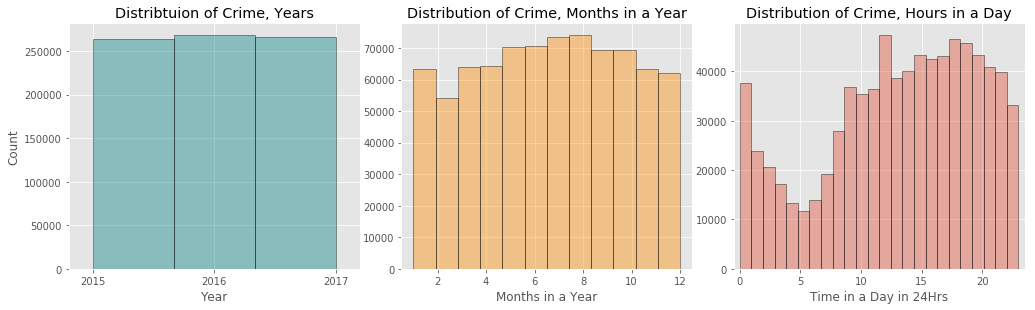

In [17]:
# Distribution plots of Crimes across the Years, Months and Hours in a Day
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize =(14,4))
plt.tight_layout()

sns.distplot(crime_weather.year, 
             kde=False, 
             axlabel= 'Year', bins=3,
             hist_kws=dict(edgecolor='k',linewidth=1), color='teal', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_xlim((2015-.2,2017+.2));
ax1.set_xticks(np.arange(2015,2018,1))
ax1.set_title('Distribtuion of Crime, Years');

sns.distplot(crime_weather.date.dt.month, 
             kde=False, bins=12, 
             axlabel= 'Months in a Year',
             hist_kws=dict(edgecolor='k',linewidth=1), color='darkorange', ax=ax2)
ax2.set_xlim((0.5,12.5));
ax2.set_title('Distribution of Crime, Months in a Year');


sns.distplot(crime_weather.date.dt.hour, 
             kde=False, bins=24, 
             axlabel= 'Time in a Day in 24Hrs',
             hist_kws=dict(edgecolor='k',linewidth=1), ax=ax3)
ax3.set_xlim((0-.5,23+.5));
ax3.set_title('Distribution of Crime, Hours in a Day');


We started exploring how crime varies across the time period between 2015 through 2017 by looking at the distribution plots in Fig.X. The total number of crimes in Chicago has remained relatively constant over the years, at a mean of 266249 crimes a year. Number of crimes do appear to increase in the summer months from June through August and crimes are more often committed from the late morning 10am onwards to 10pm at night. There is an unusual spike at 12 midnight as well as 12 noon.

In [17]:
crime_weather.year.value_counts().describe()

count         3.000000
mean     266249.333333
std        2421.624524
min      263642.000000
25%      265160.000000
50%      266678.000000
75%      267553.000000
max      268428.000000
Name: year, dtype: float64

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


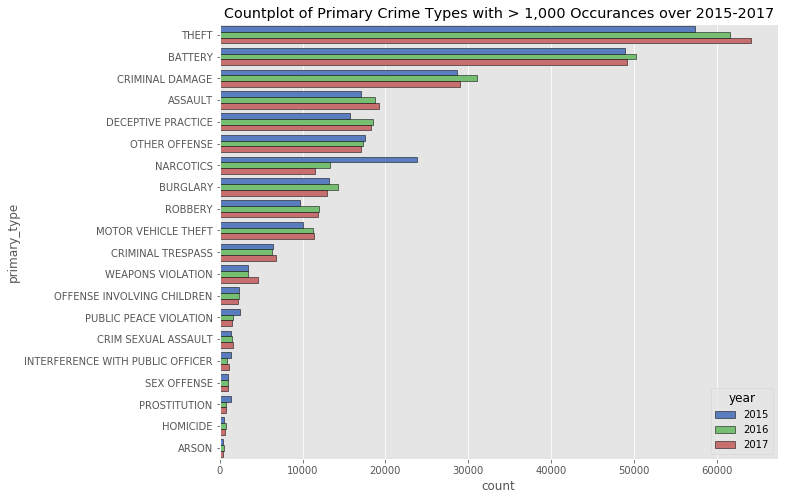

In [18]:
# Countplot of Primary Type of Crimes aross 2015-2017
fig, ax = plt.subplots(figsize=(10,8))
c = sns.countplot(y='primary_type', data=crime_weather, hue='year', palette='muted', edgecolor='k', linewidth=.5,
                order=crime_weather.primary_type.value_counts()[crime_weather.primary_type.value_counts() > 1000].index)
c.set_title("Countplot of Primary Crime Types with > 1,000 Occurances over 2015-2017");

Plotting the countplot of the primary crime types, we see that the most common of crime committed in Chicago is Theft, followed by Battery, Criminal Damage and Assault.  Of the crimes that have the most observed changes from 2015 to 2017, Theft and Narcotics stood out.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


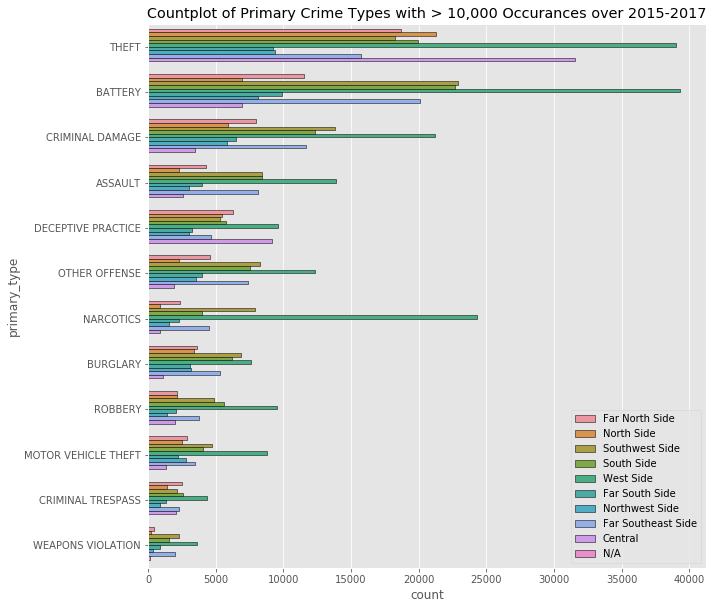

In [19]:
# Countplot of Primary Type of Crimes with Chicago Sides
fig, ax = plt.subplots(figsize=(10,10))
c = sns.countplot(y='primary_type', data=crime_weather, hue='chicago_sides', edgecolor='k', linewidth=.5,
                order=crime_weather.primary_type.value_counts()[crime_weather.primary_type.value_counts() > 10000].index)
c.legend(loc='lower right')
c.set_title("Countplot of Primary Crime Types with > 10,000 Occurances over 2015-2017");

Separating out the generation location where these crimes occur we can see overall tendancy for most crimes to be committed in the Chicago 'West Side'. For Theft cases, 'Central' location is second highest, and this is likely attributed to it being the prime commerical area.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


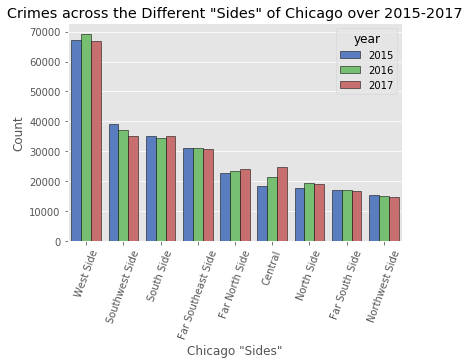

In [33]:
# Bar plot of Crimes across Sides over years
fig, ax = plt.subplots(figsize=(6,4))
d = sns.countplot(x='chicago_sides', hue='year', data = crime_weather, palette='muted', edgecolor='k', linewidth=.5,
                 order=crime_weather.chicago_sides.value_counts()[crime_weather.chicago_sides.value_counts()>0].index[:9])
d.set_xticklabels(d.get_xticklabels(), rotation=70)
plt.title('Crimes across the Different "Sides" of Chicago over 2015-2017')
plt.ylabel('Count')
plt.xlabel('Chicago "Sides"');

Over the 3 year period from 2015 through 2017, we see that Central region and to some extent the Far North Side have experienced year-on-year increase in crime, and the Southwest Side, North Side, Far South Side and the Northwest Side see a slight year-on-year decrease in crime.

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


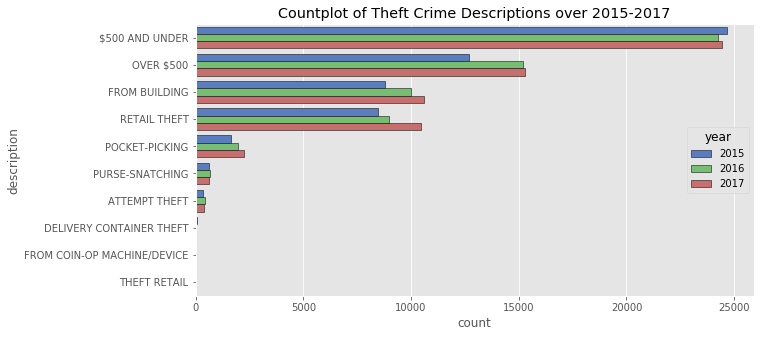

In [32]:
# Countplot of Theft Crimes Description for 2015-2017
fig, ax = plt.subplots(figsize=(10,5))
c = sns.countplot(y='description', data=crime_weather[crime_weather.primary_type == 'THEFT'], 
                  hue='year', palette='muted', edgecolor='k', linewidth=.5,
                order=crime_weather[crime_weather.primary_type == 'THEFT'].description.value_counts().index)
c.set_title("Countplot of Theft Crime Descriptions over 2015-2017");

C:\Anaconda3\lib\site-packages\seaborn\categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


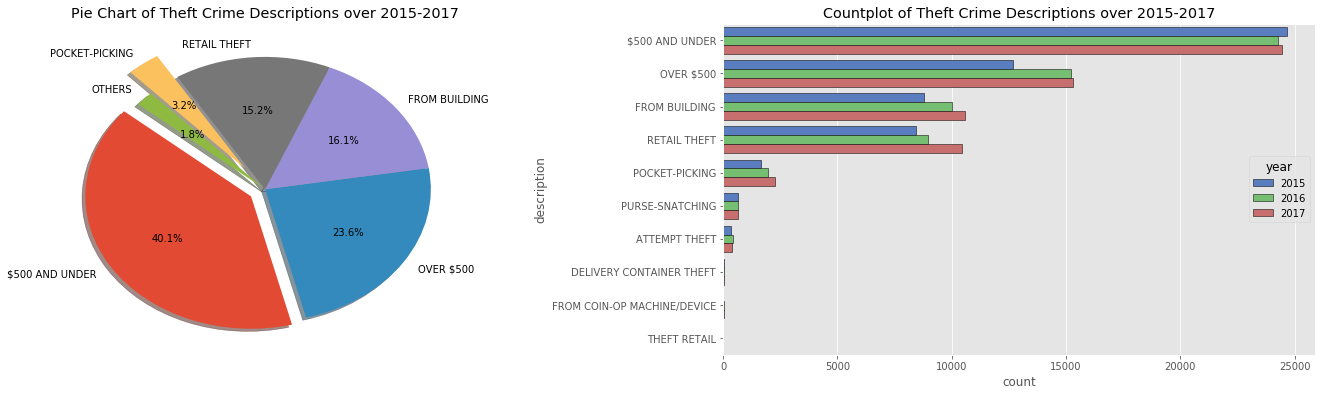

In [20]:
# Pie chart of Theft Crimes Description for 2015-2017

c_w_pie_theft_top6 = pd.DataFrame(crime_weather[crime_weather.primary_type == 'THEFT'] \
                                  .description.value_counts().sort_values(ascending=False).head(5), 
                                  copy=True)
c_w_pie_theft_top6.columns=['count']
c_w_pie_theft_others = pd.DataFrame([crime_weather[crime_weather.primary_type == 'THEFT'] \
                                     .description.value_counts().sort_values(ascending=False).tail(5).sum()],
                                    copy=True)
c_w_pie_theft_others.index=['OTHERS']
c_w_pie_theft_others.columns=['count']
c_w_pie_theft = pd.concat([c_w_pie_theft_top6, c_w_pie_theft_others])

fig, ax = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1.4, 2]}, figsize=(18,5))
plt.tight_layout(pad=0.4, w_pad=22)
labels=c_w_pie_theft.index

ax[0].pie(c_w_pie_theft,
              explode=[0.1,0,0,0,0.2,0], labels=labels,
                  autopct='%1.1f%%', shadow=True, startangle=140)
ax[0].set_title("Pie Chart of Theft Crime Descriptions over 2015-2017");


ax[1] = sns.countplot(y='description', data=crime_weather[crime_weather.primary_type == 'THEFT'], 
                  hue='year', palette='muted', edgecolor='k', linewidth=.5,
                order=crime_weather[crime_weather.primary_type == 'THEFT'].description.value_counts().index)
ax[1].set_title("Countplot of Theft Crime Descriptions over 2015-2017");

From this figure we can see that the highest proportion of Theft crimes are petty in nature with less than \$500 value. We also see an increase in four types of Theft crimes from 2015 to 2017: Over \$500, From Buildings, Retail Theft as well as Pocket-Picking.

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


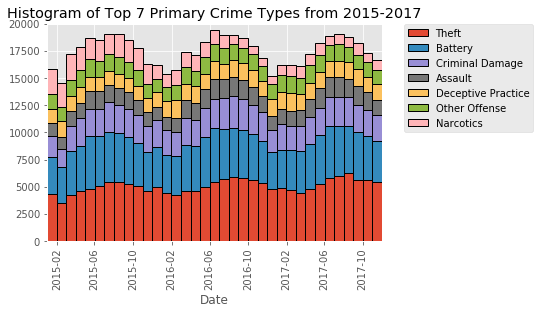

In [21]:
# Plot of top 7 Primary Crime Types across 3 years
# Seems to vary with Temperatures

x1 = crime_weather[crime_weather.primary_type.isin(['THEFT'])].date
x2 = crime_weather[crime_weather.primary_type.isin(['BATTERY'])].date
x3 = crime_weather[crime_weather.primary_type.isin(['CRIMINAL DAMAGE'])].date
x4 = crime_weather[crime_weather.primary_type.isin(['ASSAULT'])].date
x5 = crime_weather[crime_weather.primary_type.isin(['DECEPTIVE PRACTICE'])].date
x6 = crime_weather[crime_weather.primary_type.isin(['OTHER OFFENSE'])].date
x7 = crime_weather[crime_weather.primary_type.isin(['NARCOTICS'])].date

plt.figure(figsize =(6,4))
plt.hist([x1, x2, x3, x4, x5, x6, x7], bins=36, stacked=True, edgecolor='k', linewidth=1, density=False)
plt.ylim((0,20000))
plt.xlim(('2015-1','2017-12'))
plt.xticks(rotation=90)
plt.legend(['Theft','Battery','Criminal Damage', 'Assault', 'Deceptive Practice', 'Other Offense', 'Narcotics'],
          bbox_to_anchor=(1.05, 1.02))
plt.xlabel('Date')
plt.title('Histogram of Top 7 Primary Crime Types from 2015-2017')
plt.show()

Further investigation how the top crimes vary across the months 2015 to 2017, we do see a repeated pattern that crimes are higher in the summer months from June to August.  There could be a relationship that during the warmer months, there is more criminal activity in Chicago.  There also seems to be slight increase in some types of crime, and decrease in other crime types over this 2015 to 2017 period, and we further investigated tow of these crime types, Theft and Narcotics below.

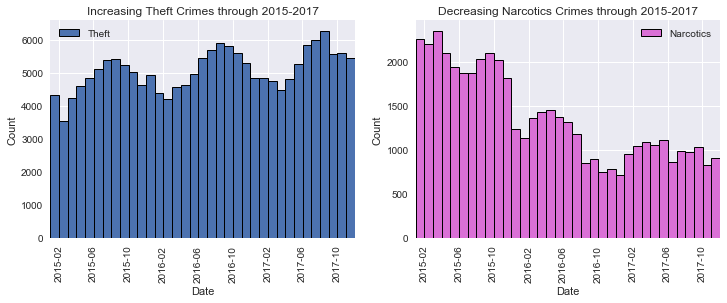

In [57]:
# Subplotting of Theft and Narcotics Trend

fig, axes = plt.subplots(1, 2, figsize =(12,4))
axes[0].hist(x1, bins=36, stacked=True, edgecolor='k', linewidth=1, density=False)
axes[0].set_xlim(('2015-1','2017-12'))
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Count')
axes[0].legend(['Theft'])
axes[0].set_title('Increasing Theft Crimes through 2015-2017')

axes[1].hist(x7, bins=36, stacked=True, edgecolor='k', linewidth=1, density=False, color='orchid')
axes[1].set_xlim(('2015-1','2017-12'))
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Count')
axes[1].legend(['Narcotics'])
axes[1].set_title('Decreasing Narcotics Crimes through 2015-2017')

# Rotating axes to 90 deg for each subplot
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

In looking at the individual trends of Theft crimes and Narcotics crimes, we do see an increasing trend for Theft crimes and a starkly decreasing trend for Narcotics.

We can also notice that Theft crimes, which are the most frequently committed type of crime, have the highest activity in the month of August.

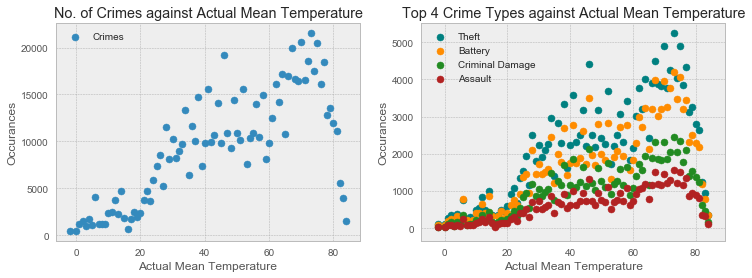

In [48]:
# Scatter plot of crimes against mean temperature
# Scatter plot of Top 4 Primary Crime Types against mean temperature
t0 = crime_weather.groupby('actual_mean_temp').count()
t1 = crime_weather[crime_weather.primary_type.isin(['THEFT'])].groupby('actual_mean_temp').count()
t2 = crime_weather[crime_weather.primary_type.isin(['BATTERY'])].groupby('actual_mean_temp').count()
t3 = crime_weather[crime_weather.primary_type.isin(['CRIMINAL DAMAGE'])].groupby('actual_mean_temp').count()
t4 = crime_weather[crime_weather.primary_type.isin(['ASSAULT'])].groupby('actual_mean_temp').count()

fig, axes = plt.subplots(1, 2, figsize =(12,4))

axes[0].scatter(x=t0.index, y='primary_type',data=t0)
axes[0].legend(['Crimes'])
axes[0].set_xlabel('Actual Mean Temperature')
axes[0].set_ylabel('Occurances')
axes[0].set_title("No. of Crimes against Actual Mean Temperature")

axes[1].scatter(x=t1.index, y='primary_type',data=t1, c='teal')
axes[1].scatter(x=t2.index, y='primary_type',data=t2, c='darkorange')
axes[1].scatter(x=t3.index, y='primary_type',data=t3, c='forestgreen')
axes[1].scatter(x=t4.index, y='primary_type',data=t4, c='firebrick')
axes[1].legend(['Theft', 'Battery', 'Criminal Damage','Assault'])
axes[1].set_xlabel('Actual Mean Temperature')
axes[1].set_ylabel('Occurances')
axes[1].set_title("Top 4 Crime Types against Actual Mean Temperature")
plt.show()

Following on the pattern of crimes increasing in the summer months, we dived futher to see if there is a relationship between rising temperatures and crime. As shown in Fig. X, we do see that the total number of crimes increases with temperature up to the maximum of 73 deg F, with a total of 21528 crimes committed at this temperature. However, criminal activity drops off steeply past this temperature maxima.

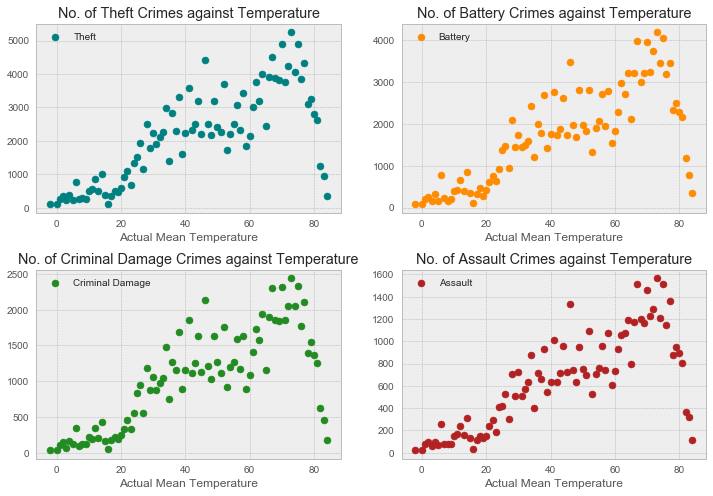

In [47]:
# Subplots for Top 4 Primary Crime Types against mean temperature 

t1 = crime_weather[crime_weather.primary_type.isin(['THEFT'])].groupby('actual_mean_temp').count()
t2 = crime_weather[crime_weather.primary_type.isin(['BATTERY'])].groupby('actual_mean_temp').count()
t3 = crime_weather[crime_weather.primary_type.isin(['CRIMINAL DAMAGE'])].groupby('actual_mean_temp').count()
t4 = crime_weather[crime_weather.primary_type.isin(['ASSAULT'])].groupby('actual_mean_temp').count()

fig, axes = plt.subplots(2, 2, figsize =(12,8))
fig.subplots_adjust(hspace=.3)

axes[0,0].scatter(x=t1.index, y='primary_type',data=t1,c='teal')
axes[0,0].legend(['Theft'])
axes[0,0].set_title('No. of Theft Crimes against Temperature')
axes[0,0].set_xlabel('Actual Mean Temperature')

axes[0,1].scatter(x=t2.index, y='primary_type',data=t2, c='darkorange')
axes[0,1].legend(['Battery'])
axes[0,1].set_title('No. of Battery Crimes against Temperature')
axes[0,1].set_xlabel('Actual Mean Temperature')

axes[1,0].scatter(x=t3.index, y='primary_type',data=t3, c='forestgreen')
axes[1,0].legend(['Criminal Damage'])
axes[1,0].set_title('No. of Criminal Damage Crimes against Temperature')
axes[1,0].set_xlabel('Actual Mean Temperature')

axes[1,1].scatter(x=t4.index, y='primary_type',data=t4, c='firebrick')
axes[1,1].legend(['Assault'])
axes[1,1].set_title('No. of Assault Crimes against Temperature')
axes[1,1].set_xlabel('Actual Mean Temperature');

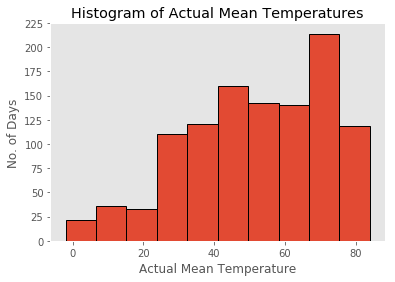

In [34]:
# Crime by actual mean temperature
weather_file.actual_mean_temp.hist(grid=False, edgecolor='k', linewidth=1)
plt.ylabel('No. of Days')
plt.xlabel('Actual Mean Temperature')
plt.title('Histogram of Actual Mean Temperatures');

# Domestic Crime Analysis

In [486]:
# Dataframes for domestic crimes
dom_df = crime_weather[crime_weather.domestic == True]
c_dom_df = dom_df[dom_df.temp_desc.isin(['Very Cold', 'Cold'])]
p_dom_df = dom_df[dom_df.temp_desc == 'Pleasant']
w_dom_df = dom_df[dom_df.temp_desc.isin(['Warm', 'Very Warm'])]
vlnt_dom_df = dom_df[dom_df.violent_crime == True]
nvlnt_dom_df = dom_df[dom_df.violent_crime == False]
peak_mths_dom_df = dom_df[dom_df.date.dt.month.isin([5,6,7,8])]
vlnt_peak_mths_dom_df = peak_mths_dom_df[peak_mths_dom_df.violent_crime == True]
prop_peak_mths_dom_df = peak_mths_dom_df[peak_mths_dom_df.property_crime == True]

dom_yr_mth_df = pd.DataFrame({'crime_ct':dom_df.groupby([dom_df.date.dt.strftime('%m'),'year']) \
                          .description.count()/1000}).reset_index()
cw_yr_dom_df = pd.DataFrame({'crime_ct':crime_weather.groupby(['year','domestic']).iucr.count()}) \
                    .reset_index()
yr_typ_dom_df = pd.DataFrame({'crime_ct':dom_df.groupby(['year','fbi_crime_type']).iucr.count()}) \
                    .reset_index()
    
temp_vlnt_dom_df = vlnt_dom_df.groupby('actual_mean_temp').count()
temp_nvlnt_dom_df = nvlnt_dom_df.groupby('actual_mean_temp').count()

# Pivots
dom_yr_mth_pvt = dom_yr_mth_df.pivot_table(values='crime_ct', index='date', columns='year')
cw_yr_dom_pvt = cw_yr_dom_df.pivot_table(values='crime_ct', index='year', columns='domestic')
cw_yr_dom_pvt.columns=['NonDomestic','Domestic']

yr_typ_dom_pvt = yr_typ_dom_df.pivot_table(values='crime_ct', index='year', columns='fbi_crime_type')
yr_typ_dom_pvt.columns=['Index','Non-Index']

# peak_mths_dom_df.groupby(['fbi_crime_type','violent_crime','property_crime']).iucr.count()

In [487]:
# Domestic Vs Non Domestic Crimes
cw_yr_dom_pvt

,NonDomestic,Domestic
year,,
2015,221903,41739
2016,225456,42972
2017,224226,42452


In [488]:
# Index Vs Non Index crimes
yr_typ_dom_pvt

,Index,Non-Index
year,,
2015,5850,35889
2016,6488,36484
2017,6861,35591


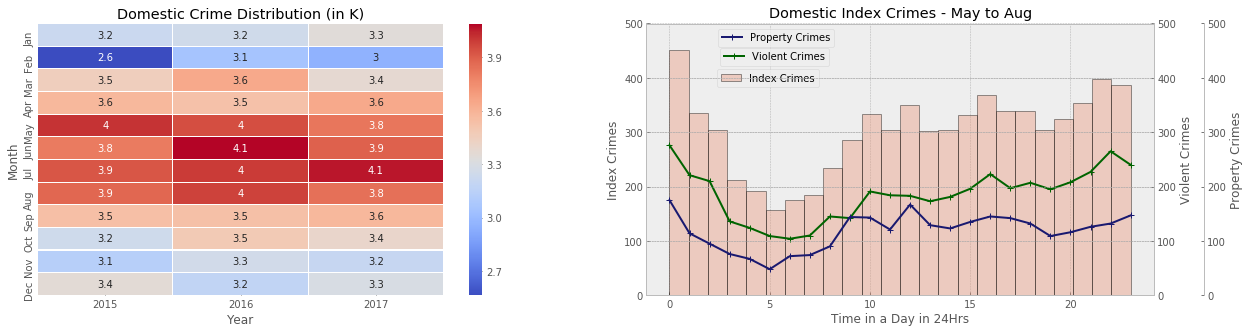

In [513]:
# Domestic Crime in General
fig = plt.subplots(1,2,figsize=(20,5))
ax0 = plt.subplot(1,2,1)
sns.heatmap(dom_yr_mth_pvt, yticklabels=MonthNames, annot=True,linewidths=.02, cmap="coolwarm")
ax0.set_title("Domestic Crime Distribution (in K)")
ax0.set_xlabel("Year")
ax0.set_ylabel("Month")

ax1 = plt.subplot(1,2,2)
ax1.sharex=True
ax2 = ax1.twinx()
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 50))
sns.distplot(peak_mths_dom_df[peak_mths_dom_df.fbi_crime_type == 'Index'].date.dt.hour, 
             kde=False, bins=24, color='darksalmon', ax=ax1,
             axlabel= 'Time in a Day in 24Hrs',
             hist_kws=dict(edgecolor='k',linewidth=1))
vlnt_peak_mths_dom_df.groupby(vlnt_peak_mths_dom_df.date.dt.hour).description.count() \
                .plot.line(marker='+', ax=ax2, legend=False,color='darkgreen')
prop_peak_mths_dom_df.groupby(prop_peak_mths_dom_df.date.dt.hour).description.count() \
                .plot.line(marker='+', ax=ax3, legend=False,color='midnightblue')

ax3.legend(['Property Crimes'], loc='upper right', bbox_to_anchor=(0.38, 1))
ax2.legend(['Violent Crimes'], loc='upper right', bbox_to_anchor=(0.37, .93))
ax1.legend(['Index Crimes'], loc='upper right', bbox_to_anchor=(0.35, .85))
plt.title('Domestic Index Crimes - May to Aug')
ax3.set_ylabel('Property Crimes')
ax2.set_ylim((0,500))
ax1.set_ylim((0,500))
ax3.set_ylim((0,500))
ax2.set_ylabel('Violent Crimes')
ax1.set_ylabel('Index Crimes')
plt.show()

A comparison between domestic and non-domestic crimes shows that domestic crimes are much lesser as compared to other types of crimes. While the number varies acrosss years, the domestic to non-domestic crime ratio is more or less the same.<br>
The trend for Domestic crimes doesn't appear to be any different than the overall trend. The frequency is lesser earlier in the year and towards the end of the year and goes up during the summer months with February recording the lowest number of crimes every year. Interestingly, when comparing data across different years, the trends seem to be similar for alternate years. The domestic crime distribution across the various months of 2015 seems to resemble the ones for 2017 more than the ones for 2016.

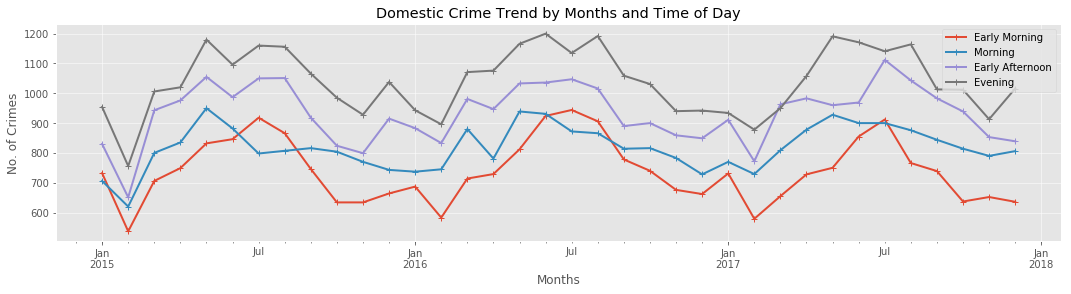

In [492]:
# Domestic crime trend by TimeDesc
axes = dom_df.groupby([dom_df.date.values.astype('datetime64[M]'),'time_desc']).description.count() \
                .sort_values(ascending=False).unstack().plot.line(marker='+',figsize=(18,4))
axes.set_title("Domestic Crime Trend by Months and Time of Day")
axes.set_xlabel("Months")
axes.set_ylabel("No. of Crimes")
axes.legend(loc='upper right')
plt.show()


Domestic crimes are at their peak during evenings and are the least during early mornings. Usually the number of crimes goes up as the day progresses. However, during the summer months, the crimes committed during early mornings exceed the number of crimes committed before early afternoon.<br>
It also appears that the rate decline in domestic crimes in February every year before picking up again in March. 

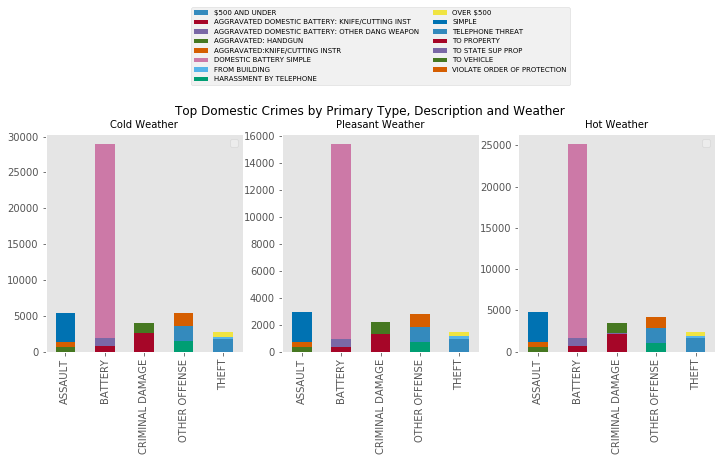

In [493]:
# Top 5 Primary Types and Top 5 Descriptions within each - for Domestic crimes
# Cold Weather
ctop5 = c_dom_df.groupby('primary_type').description.count().sort_values(ascending=False) \
                    .head(5).index
ctop5_df = c_dom_df[c_dom_df.primary_type.isin(ctop5)].groupby(['primary_type','description']) \
                    .description.count()
ctop5_grp = ctop5_df.groupby(level=0, group_keys=False)
ctop5_grp_top3 = pd.DataFrame(ctop5_grp.nlargest(3)).unstack()
ctop5_grp_top3.columns = ctop5_grp_top3.columns.get_level_values(1)

# Pleasant Weather
ptop5 = p_dom_df.groupby('primary_type').description.count().sort_values(ascending=False) \
                    .head(5).index
ptop5_df = p_dom_df[p_dom_df.primary_type.isin(ptop5)].groupby(['primary_type','description']) \
                    .description.count()
ptop5_grp = ptop5_df.groupby(level=0, group_keys=False)
ptop5_grp_top3 = pd.DataFrame(ptop5_grp.nlargest(3)).unstack()
ptop5_grp_top3.columns = ptop5_grp_top3.columns.get_level_values(1)

# Warm Weather
wtop5 = w_dom_df.groupby('primary_type').description.count().sort_values(ascending=False) \
                    .head(5).index
wtop5_df = w_dom_df[w_dom_df.primary_type.isin(wtop5)].groupby(['primary_type','description']) \
                    .description.count()
wtop5_grp = wtop5_df.groupby(level=0, group_keys=False)
wtop5_grp_top3 = pd.DataFrame(wtop5_grp.nlargest(3)).unstack()
wtop5_grp_top3.columns = wtop5_grp_top3.columns.get_level_values(1)

# Plots
fig, ax = plt.subplots(1,3,figsize=(12,4))
plt.suptitle("Top Domestic Crimes by Primary Type, Description and Weather")
plt.style.use('bmh')

ctop5_grp_top3.plot.bar(ax=ax[0],stacked=True, grid=False)
ax[0].set_title("Cold Weather", fontsize=10)
ax[0].set_xlabel("")
ax[0].legend('')

ptop5_grp_top3.plot.bar(ax=ax[1],stacked=True, grid=False)
ax[1].set_title("Pleasant Weather", fontsize=10)
ax[1].set_xlabel("")
ax[1].legend(loc='upper center', prop={'size': 7}, ncol=2, bbox_to_anchor=(0.5, 1.6))

wtop5_grp_top3.plot.bar(ax=ax[2],stacked=True, grid=False)
ax[2].set_title("Hot Weather", fontsize=10)
ax[2].set_xlabel("")
ax[2].legend('')
plt.show()

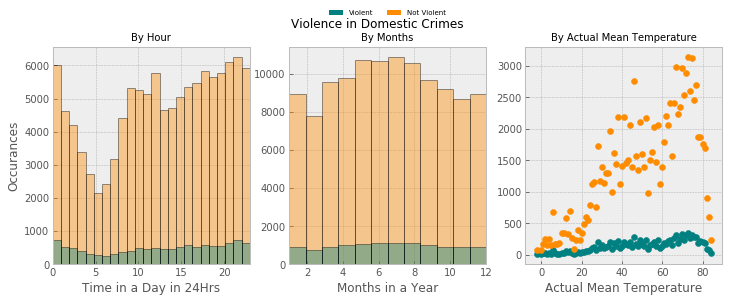

In [494]:
# Violence in domestic crimes
fig, ax = plt.subplots(1,3,figsize=(12,4))
plt.suptitle("Violence in Domestic Crimes")
plt.subplot(1, 3, 1)
sns.distplot(nvlnt_dom_df.date.dt.hour, 
             kde=False, bins=24, color='darkorange',
             axlabel= 'Time in a Day in 24Hrs',
             hist_kws=dict(edgecolor='k',linewidth=1))
sns.distplot(vlnt_dom_df.date.dt.hour, 
             kde=False, bins=24, color='teal',
             axlabel= 'Time in a Day in 24Hrs',
             hist_kws=dict(edgecolor='k',linewidth=1))
plt.xlim((0,23));
plt.ylabel('Occurances')
plt.title('By Hour', fontsize=10);

plt.subplot(1, 3, 2)
sns.distplot(nvlnt_dom_df.date.dt.month, 
             kde=False, bins=12, color='darkorange',
             axlabel= 'Months in a Year',
             hist_kws=dict(edgecolor='k',linewidth=1))
sns.distplot(vlnt_dom_df.date.dt.month, 
             kde=False, bins=12, color='teal',
             axlabel= 'Months in a Year',
             hist_kws=dict(edgecolor='k',linewidth=1))
plt.xlim((1,12));
violent = plt.Rectangle((0,0),1,1,fc="teal", edgecolor = 'none')
nviolent = plt.Rectangle((0,0),1,1,fc='darkorange',  edgecolor = 'none')
l = plt.legend([violent, nviolent], ['Violent', 'Not Violent'], loc='upper center', prop={'size': 7}, ncol=2, bbox_to_anchor=(0.5, 1.2))
l.draw_frame(False)
plt.title('By Months', fontsize=10);


plt.subplot(1,3,3)
plt.scatter(x=temp_vlnt_dom_df.index, y='primary_type',data=temp_vlnt_dom_df, c='teal')
plt.scatter(x=temp_nvlnt_dom_df.index, y='primary_type',data=temp_nvlnt_dom_df, c='darkorange')
# axes[1].legend(['Theft', 'Battery', 'Criminal Damage','Assault'])
plt.xlabel('Actual Mean Temperature')
# plt.set_ylabel('Occurances')
plt.title("By Actual Mean Temperature", fontsize=10)
plt.show()

When it comes to violence in domestic crimes, the number of violent crimes far exceeds the number of non violent crimes. However while the violent domestic crimes are at peak late at night, the non violent domestic crimes seem to peak in the morning to noon hours. Although both types of domestic crimes increase in summer, the number of non violent domestic crimes don't vary as much throughout the year as the violent crimes do. The only exception, as has been seen repeatedly is February, when the number goes down for both violent and non violent domestic crimes. <br>
In terms of temperature, there isn't much difference between violent and non violent domestic crimes at lower temperatures. However, the gap increases as the temperatures rise and at mean temperatures between 60 and 80, the number of violent domestic crimes are considerably more than that of the ones not involving violence. Both however, reduce in number at really high temperatures (between 80 and 85 degrees). 

# Crimes Involving Firearms

In [495]:
# Import csv with firearm categorization and add column to dataframe
firearms_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vQXEl1TibqXvWgWHwJQMW8fi08d7yD1PnCDFNXHnVj_qeVZ7QDc2GdXly5BUk0eMrOKPbxCkUCnnmEB/pub?output=csv', names=['type'])
crime_weather['involves_arms'] = crime_weather.description.map(lambda x: True if x in list(firearms_df.type) else False)

In [496]:
# Dataframe for crimes involving firearms and dangerous weapons
arms_df = crime_weather[crime_weather.involves_arms==True]

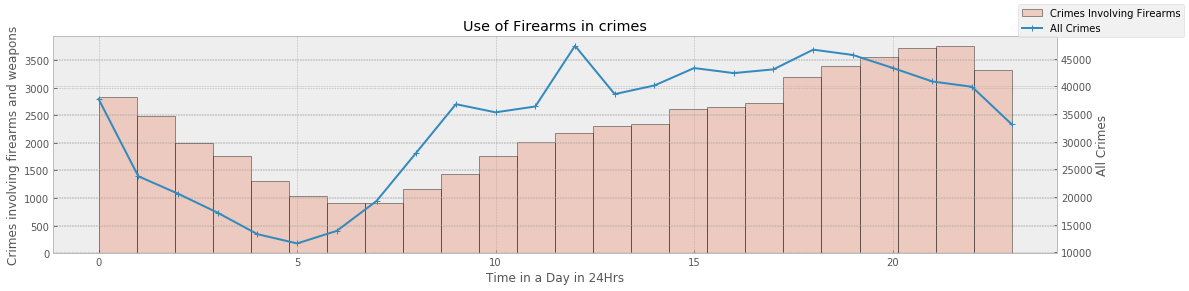

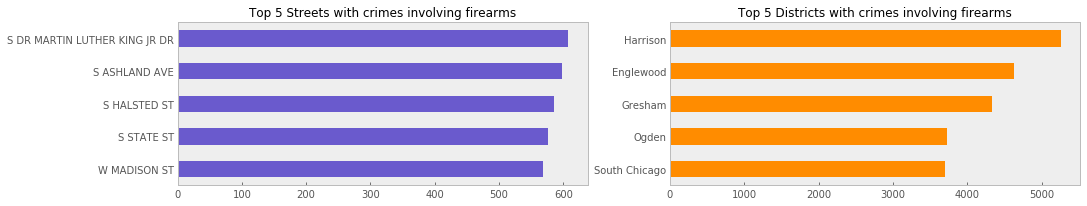

In [497]:
# Plots for use of firearms in crime
f, ax = plt.subplots(1, sharex=True)
ax2 = ax.twinx()
sns.distplot(arms_df.date.dt.hour, 
             kde=False, bins=24, color='darksalmon', ax=ax,
             axlabel= 'Time in a Day in 24Hrs',
             hist_kws=dict(edgecolor='k',linewidth=1))
crime_weather.groupby(crime_weather.date.dt.hour).description.count() \
                .plot.line(marker='+', ax=ax2, legend=False,figsize=(18,4))

f.legend(['Crimes Involving Firearms', 'All Crimes'])
plt.title('Use of Firearms in crimes')
ax.set_ylabel('Crimes involving firearms and weapons')
ax2.set_ylabel('All Crimes')
plt.show()

fig, ax = plt.subplots(1,2, figsize=(25,3))
plt.subplot(1,3,1)
plt.title('Top 5 Streets with crimes involving firearms', fontsize='12')
arms_df.street_name.value_counts().head(5).sort_values(ascending=True).plot(kind='barh', grid=False, color='slateblue')

plt.subplot(1,3,2)
plt.title('Top 5 Districts with crimes involving firearms', fontsize='12')
arms_df.district_name.value_counts().head(5).sort_values(ascending=True).plot(kind='barh', grid=False, color='darkorange')
plt.show()

While the overall number of crimes peaks twice a day, once during late mornings - early afternoon and then in the early evenings after which theres a steady decline, the crimes involving firearms increase steadily during the day and peaks at late evenings after which they start declining again. <br>
S Dr Martin Luther King Jr Dr. and S Ashland Ave are the two most dangerous streets while Harrison and Englewood are the two most dangerous districts in Chicago when it comes to crimes involving firearms.

# Crime Location Vs Types

In [498]:
# Import csv with location categorization and add column to dataframe
locations_df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vTpBuqM6nGh_Uo2c06S1TPndKXTWwN-dNGCGFe5uVeF1p9kSt-BST9VdkqljcS16I60ij1ylCR3p-1s/pub?output=csv')
crime_weather = crime_weather.set_index('location_description').join(locations_df.set_index('location_description')).reset_index(drop=True)

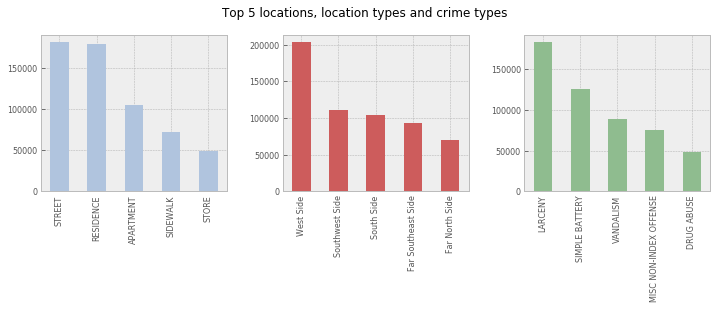

In [499]:
# PLot for correlation between locations, location types and crime types
fig, ax = plt.subplots(1,3, figsize=(12,3))
plt.suptitle("Top 5 locations, location types and crime types")
fig.subplots_adjust(top=0.85, wspace=0.3)
crime_weather.location_type.value_counts().head().plot(kind='bar', ax = ax[0], color='lightsteelblue', fontsize='8')
crime_weather.chicago_sides.value_counts().head().plot(kind='bar', ax = ax[1], color='indianred', fontsize='8')
crime_weather.fbi_cat.value_counts().head().plot(kind='bar', ax = ax[2], color='darkseagreen', fontsize='8')
plt.show()

In [500]:
# List of top 5 locations, location types and crime types
lst_loctyp = list(crime_weather.location_type.value_counts().head().index)
lst_locsid = list(crime_weather.chicago_sides.value_counts().head().index)
lst_fbicat = list(crime_weather.fbi_cat.value_counts().head().index)

top5_loc_cat_df = crime_weather[(crime_weather.location_type.isin(lst_loctyp)) & (crime_weather.fbi_cat.isin(lst_fbicat))]
x = top5_loc_cat_df.groupby(['location_type', 'fbi_cat'])

top5_locs_cat_df = crime_weather[(crime_weather.chicago_sides.isin(lst_locsid)) & (crime_weather.fbi_cat.isin(lst_fbicat))]
y = top5_locs_cat_df.groupby(['chicago_sides', 'fbi_cat'])

In [501]:
# Correlations between crime location, type and temperature
# Larceny
l1 = x.get_group(('STREET','LARCENY')).groupby('actual_mean_temp').count()
l2 = x.get_group(('RESIDENCE','LARCENY')).groupby('actual_mean_temp').count()
l3 = x.get_group(('APARTMENT','LARCENY')).groupby('actual_mean_temp').count()
l4 = x.get_group(('SIDEWALK','LARCENY')).groupby('actual_mean_temp').count()
l5 = x.get_group(('STORE','LARCENY')).groupby('actual_mean_temp').count()

# Simple Battery
s1 = x.get_group(('STREET','SIMPLE BATTERY')).groupby('actual_mean_temp').count()
s2 = x.get_group(('RESIDENCE','SIMPLE BATTERY')).groupby('actual_mean_temp').count()
s3 = x.get_group(('APARTMENT','SIMPLE BATTERY')).groupby('actual_mean_temp').count()
s4 = x.get_group(('SIDEWALK','SIMPLE BATTERY')).groupby('actual_mean_temp').count()
s5 = x.get_group(('STORE','SIMPLE BATTERY')).groupby('actual_mean_temp').count()

# Vandalism
v1 = x.get_group(('STREET','VANDALISM')).groupby('actual_mean_temp').count()
v2 = x.get_group(('RESIDENCE','VANDALISM')).groupby('actual_mean_temp').count()
v3 = x.get_group(('APARTMENT','VANDALISM')).groupby('actual_mean_temp').count()
v4 = x.get_group(('SIDEWALK','VANDALISM')).groupby('actual_mean_temp').count()
v5 = x.get_group(('STORE','VANDALISM')).groupby('actual_mean_temp').count()

# Misc Non Index Offense
m1 = x.get_group(('STREET','MISC NON-INDEX OFFENSE')).groupby('actual_mean_temp').count()
m2 = x.get_group(('RESIDENCE','MISC NON-INDEX OFFENSE')).groupby('actual_mean_temp').count()
m3 = x.get_group(('APARTMENT','MISC NON-INDEX OFFENSE')).groupby('actual_mean_temp').count()
m4 = x.get_group(('SIDEWALK','MISC NON-INDEX OFFENSE')).groupby('actual_mean_temp').count()
m5 = x.get_group(('STORE','MISC NON-INDEX OFFENSE')).groupby('actual_mean_temp').count()

# Drug Abuse
d1 = x.get_group(('STREET','DRUG ABUSE')).groupby('actual_mean_temp').count()
d2 = x.get_group(('RESIDENCE','DRUG ABUSE')).groupby('actual_mean_temp').count()
d3 = x.get_group(('APARTMENT','DRUG ABUSE')).groupby('actual_mean_temp').count()
d4 = x.get_group(('SIDEWALK','DRUG ABUSE')).groupby('actual_mean_temp').count()
d5 = x.get_group(('STORE','DRUG ABUSE')).groupby('actual_mean_temp').count()

In [502]:
# Correlations between crime location (chicago sides), type and temperature
# Larceny
lt1 = y.get_group(('West Side','LARCENY')).groupby('actual_mean_temp').count()
lt2 = y.get_group(('Southwest Side','LARCENY')).groupby('actual_mean_temp').count()
lt3 = y.get_group(('South Side','LARCENY')).groupby('actual_mean_temp').count()
lt4 = y.get_group(('Far Southeast Side','LARCENY')).groupby('actual_mean_temp').count()
lt5 = y.get_group(('Far North Side','LARCENY')).groupby('actual_mean_temp').count()

# Simple Battery
st1 = y.get_group(('West Side','SIMPLE BATTERY')).groupby('actual_mean_temp').count()
st2 = y.get_group(('Southwest Side','SIMPLE BATTERY')).groupby('actual_mean_temp').count()
st3 = y.get_group(('South Side','SIMPLE BATTERY')).groupby('actual_mean_temp').count()
st4 = y.get_group(('Far Southeast Side','SIMPLE BATTERY')).groupby('actual_mean_temp').count()
st5 = y.get_group(('Far North Side','SIMPLE BATTERY')).groupby('actual_mean_temp').count()

# Vandalism
vt1 = y.get_group(('West Side','VANDALISM')).groupby('actual_mean_temp').count()
vt2 = y.get_group(('Southwest Side','VANDALISM')).groupby('actual_mean_temp').count()
vt3 = y.get_group(('South Side','VANDALISM')).groupby('actual_mean_temp').count()
vt4 = y.get_group(('Far Southeast Side','VANDALISM')).groupby('actual_mean_temp').count()
vt5 = y.get_group(('Far North Side','VANDALISM')).groupby('actual_mean_temp').count()

# Misc Non Index Offense
mt1 = y.get_group(('West Side','MISC NON-INDEX OFFENSE')).groupby('actual_mean_temp').count()
mt2 = y.get_group(('Southwest Side','MISC NON-INDEX OFFENSE')).groupby('actual_mean_temp').count()
mt3 = y.get_group(('South Side','MISC NON-INDEX OFFENSE')).groupby('actual_mean_temp').count()
mt4 = y.get_group(('Far Southeast Side','MISC NON-INDEX OFFENSE')).groupby('actual_mean_temp').count()
mt5 = y.get_group(('Far North Side','MISC NON-INDEX OFFENSE')).groupby('actual_mean_temp').count()

# Drug Abuse
dt1 = y.get_group(('West Side','DRUG ABUSE')).groupby('actual_mean_temp').count()
dt2 = y.get_group(('Southwest Side','DRUG ABUSE')).groupby('actual_mean_temp').count()
dt3 = y.get_group(('South Side','DRUG ABUSE')).groupby('actual_mean_temp').count()
dt4 = y.get_group(('Far Southeast Side','DRUG ABUSE')).groupby('actual_mean_temp').count()
dt5 = y.get_group(('Far North Side','DRUG ABUSE')).groupby('actual_mean_temp').count()

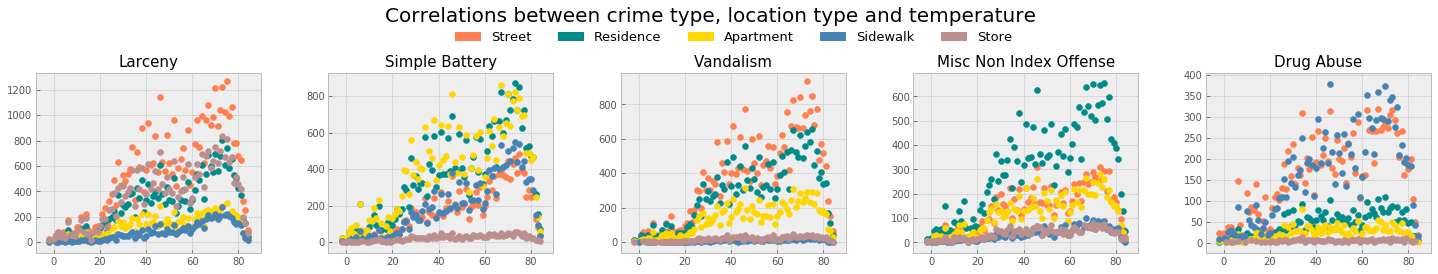

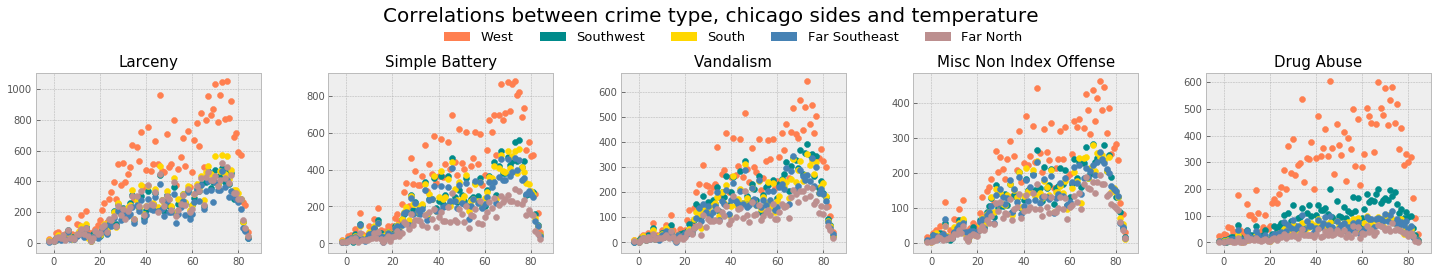

In [503]:
# Plots for correlations between crime type, location type and temperature
fig = plt.figure(figsize=(25,4))
plt.suptitle("Correlations between crime type, location type and temperature", fontsize='20')
fig.subplots_adjust(top=0.75, wspace=0.3)
ax1=fig.add_subplot(1,5,1)
ax1.scatter(x=l1.index, y=l1.fbi_cat, color='coral')
ax1.scatter(x=l2.index, y=l2.fbi_cat, color='darkcyan')
ax1.scatter(x=l3.index, y=l3.fbi_cat, color='gold')
ax1.scatter(x=l4.index, y=l4.fbi_cat, color='steelblue')
ax1.scatter(x=l5.index, y=l5.fbi_cat, color='rosybrown')
ax1.set_title('Larceny', fontsize='15')

ax2=fig.add_subplot(1,5,2)
ax2.scatter(x=s1.index, y=s1.fbi_cat, color='coral')
ax2.scatter(x=s2.index, y=s2.fbi_cat, color='darkcyan')
ax2.scatter(x=s3.index, y=s3.fbi_cat, color='gold')
ax2.scatter(x=s4.index, y=s4.fbi_cat, color='steelblue')
ax2.scatter(x=s5.index, y=s5.fbi_cat, color='rosybrown')
ax2.set_title('Simple Battery', fontsize='15')

ax3=fig.add_subplot(1,5,3)
ax3.scatter(x=v1.index, y=v1.fbi_cat, color='coral')
ax3.scatter(x=v2.index, y=v2.fbi_cat, color='darkcyan')
ax3.scatter(x=v3.index, y=v3.fbi_cat, color='gold')
ax3.scatter(x=v4.index, y=v4.fbi_cat, color='steelblue')
ax3.scatter(x=v5.index, y=v5.fbi_cat, color='rosybrown')
street = plt.Rectangle((0,0),1,1,fc="coral", edgecolor = 'none')
residence = plt.Rectangle((0,0),1,1,fc='darkcyan',  edgecolor = 'none')
apartment = plt.Rectangle((0,0),1,1,fc="gold", edgecolor = 'none')
sidewalk = plt.Rectangle((0,0),1,1,fc='steelblue',  edgecolor = 'none')
store = plt.Rectangle((0,0),1,1,fc='rosybrown',  edgecolor = 'none')
lgnd = plt.legend([street, residence, apartment, sidewalk, store], 
                  ['Street', 'Residence', 'Apartment', 'Sidewalk', 'Store'], 
                  loc='upper center', prop={'size': 13}, ncol=5, bbox_to_anchor=(.5, 1.3))
lgnd.draw_frame(False)
ax3.set_title('Vandalism', fontsize='15')

ax4=fig.add_subplot(1,5,4)
ax4.scatter(x=m1.index, y=m1.fbi_cat, color='coral')
ax4.scatter(x=m2.index, y=m2.fbi_cat, color='darkcyan')
ax4.scatter(x=m3.index, y=m3.fbi_cat, color='gold')
ax4.scatter(x=m4.index, y=m4.fbi_cat, color='steelblue')
ax4.scatter(x=m5.index, y=m5.fbi_cat, color='rosybrown')
ax4.set_title('Misc Non Index Offense', fontsize='15')

ax5=fig.add_subplot(1,5,5)
ax5.scatter(x=d1.index, y=d1.fbi_cat, color='coral')
ax5.scatter(x=d2.index, y=d2.fbi_cat, color='darkcyan')
ax5.scatter(x=d3.index, y=d3.fbi_cat, color='gold')
ax5.scatter(x=d4.index, y=d4.fbi_cat, color='steelblue')
ax5.scatter(x=d5.index, y=d5.fbi_cat, color='rosybrown')
ax5.set_title('Drug Abuse', fontsize='15')
plt.show()

# Plots for correlations between crime type, chicago sides and months
fig = plt.figure(figsize=(25,4))
plt.suptitle("Correlations between crime type, chicago sides and temperature", fontsize='20')
fig.subplots_adjust(top=0.75, wspace=0.3)
ax1=fig.add_subplot(1,5,1)
ax1.scatter(x=lt1.index, y=lt1.fbi_cat, color='coral')
ax1.scatter(x=lt2.index, y=lt2.fbi_cat, color='darkcyan')
ax1.scatter(x=lt3.index, y=lt3.fbi_cat, color='gold')
ax1.scatter(x=lt4.index, y=lt4.fbi_cat, color='steelblue')
ax1.scatter(x=lt5.index, y=lt5.fbi_cat, color='rosybrown')
ax1.set_title('Larceny', fontsize='15')

ax2=fig.add_subplot(1,5,2)
ax2.scatter(x=st1.index, y=st1.fbi_cat, color='coral')
ax2.scatter(x=st2.index, y=st2.fbi_cat, color='darkcyan')
ax2.scatter(x=st3.index, y=st3.fbi_cat, color='gold')
ax2.scatter(x=st4.index, y=st4.fbi_cat, color='steelblue')
ax2.scatter(x=st5.index, y=st5.fbi_cat, color='rosybrown')
ax2.set_title('Simple Battery', fontsize='15')

ax3=fig.add_subplot(1,5,3)
ax3.scatter(x=vt1.index, y=vt1.fbi_cat, color='coral')
ax3.scatter(x=vt2.index, y=vt2.fbi_cat, color='darkcyan')
ax3.scatter(x=vt3.index, y=vt3.fbi_cat, color='gold')
ax3.scatter(x=vt4.index, y=vt4.fbi_cat, color='steelblue')
ax3.scatter(x=vt5.index, y=vt5.fbi_cat, color='rosybrown')
west = plt.Rectangle((0,0),1,1,fc="coral", edgecolor = 'none')
swest = plt.Rectangle((0,0),1,1,fc='darkcyan',  edgecolor = 'none')
south = plt.Rectangle((0,0),1,1,fc="gold", edgecolor = 'none')
fseast = plt.Rectangle((0,0),1,1,fc='steelblue',  edgecolor = 'none')
fnorth = plt.Rectangle((0,0),1,1,fc='rosybrown',  edgecolor = 'none')
lgnd = plt.legend([west, swest, south, fseast, fnorth], 
                  ['West', 'Southwest', 'South', 'Far Southeast', 'Far North'], 
                  loc='upper center', prop={'size': 13}, ncol=5, bbox_to_anchor=(.5, 1.3))
lgnd.draw_frame(False)
ax3.set_title('Vandalism', fontsize='15')

ax4=fig.add_subplot(1,5,4)
ax4.scatter(x=mt1.index, y=mt1.fbi_cat, color='coral')
ax4.scatter(x=mt2.index, y=mt2.fbi_cat, color='darkcyan')
ax4.scatter(x=mt3.index, y=mt3.fbi_cat, color='gold')
ax4.scatter(x=mt4.index, y=mt4.fbi_cat, color='steelblue')
ax4.scatter(x=mt5.index, y=mt5.fbi_cat, color='rosybrown')
ax4.set_title('Misc Non Index Offense', fontsize='15')

ax5=fig.add_subplot(1,5,5)
ax5.scatter(x=dt1.index, y=dt1.fbi_cat, color='coral')
ax5.scatter(x=dt2.index, y=dt2.fbi_cat, color='darkcyan')
ax5.scatter(x=dt3.index, y=dt3.fbi_cat, color='gold')
ax5.scatter(x=dt4.index, y=dt4.fbi_cat, color='steelblue')
ax5.scatter(x=dt5.index, y=dt5.fbi_cat, color='rosybrown')
ax5.set_title('Drug Abuse', fontsize='15')
plt.show()

An analysis of the patterns involving the top five location types and top 5 crime types based on fbi identification shows a definite correlation between the type of crime and location. Larceny seems to be more common in streets and least in sidewalks. Crimes related to simple battery occur more on residences and apartments and the least in stores. Vandalism is more common in streets and the least in stores and sidewalks. Drug Abuse is more common in sidewalks and streets and least in stores while misc non index (non serious) offenses are more common in residences and least in sidewalks and stores. Overall, streets seem to be most prone to crimes while stores are the least.<br>
For chicago sides...

In [516]:
# Geospatial Plots
# In order to plot the geospatial graphs, download the shapefile (.shp) from the Datafiles folder 
# in git and save it locally
# Then use the following os command to change the working directory to that location

os.chdir('/Users/apaul2/Documents/_Others/_Temp/mids/Python/Data/Boundaries')
gdf = gpd.read_file('geo_export_350ba617-88bf-4a5d-b7bc-f9c523551dc9.shp')

In [517]:
theft_df = crime_weather[crime_weather.primary_type=='THEFT']
theft_df = pd.DataFrame({'theft_ct':theft_df.groupby('community_area').iucr.count()})
batt_df = crime_weather[crime_weather.primary_type=='BATTERY']
batt_df = pd.DataFrame({'batt_ct':batt_df.groupby('community_area').iucr.count()})
cdam_df = crime_weather[crime_weather.primary_type=='CRIMINAL DAMAGE']
cdam_df = pd.DataFrame({'cdam_ct':cdam_df.groupby('community_area').iucr.count()})
asslt_df = crime_weather[crime_weather.primary_type=='ASSAULT']
asslt_df = pd.DataFrame({'asslt_ct':asslt_df.groupby('community_area').iucr.count()})
dprac_df = crime_weather[crime_weather.primary_type=='DECEPTIVE PRACTICE']
dprac_df = pd.DataFrame({'dprac_ct':dprac_df.groupby('community_area').iucr.count()})

In [518]:
gdf['comm_ar'] = pd.to_numeric(gdf.area_numbe)
gdf = gdf.set_index('comm_ar').join(theft_df)
gdf = gdf.join(batt_df)
gdf = gdf.join(cdam_df)
gdf = gdf.join(asslt_df)
gdf = gdf.join(dprac_df)

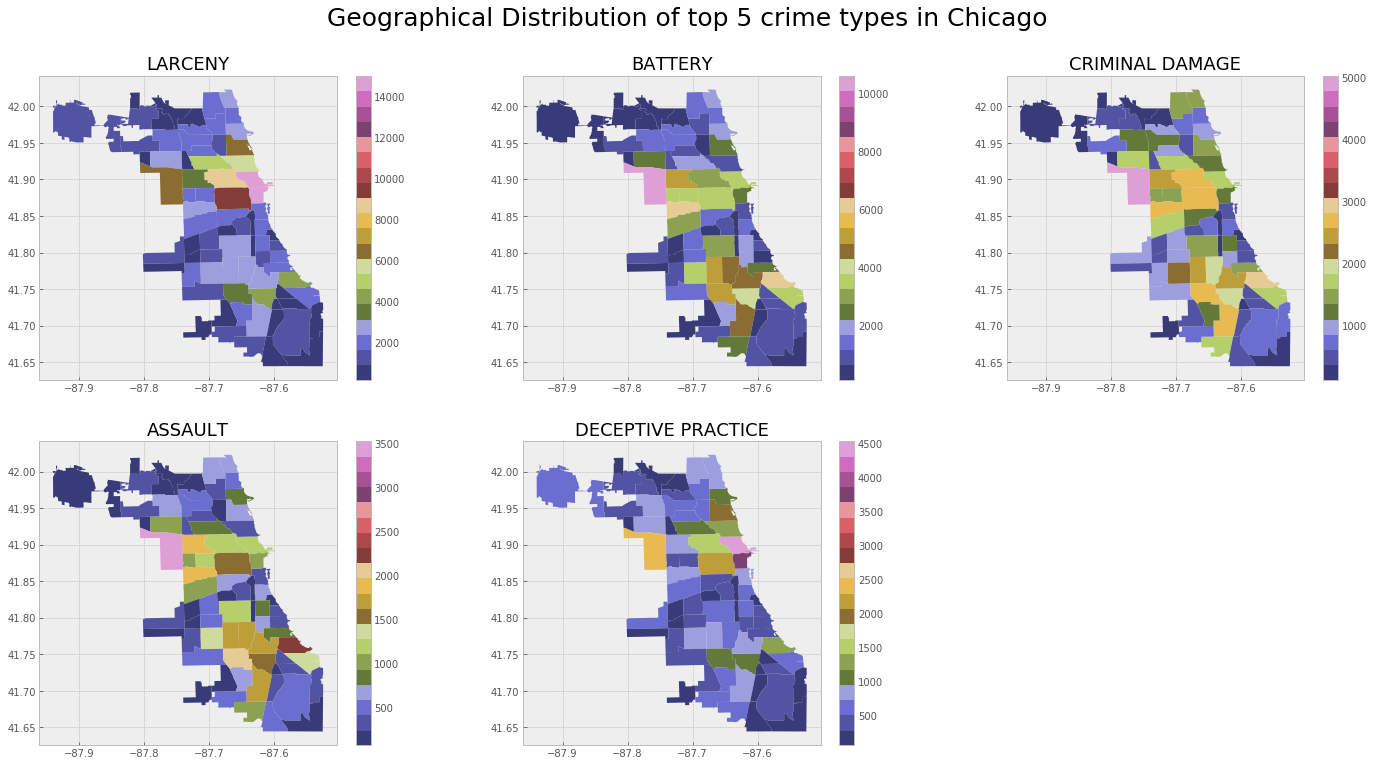

In [524]:
fig= plt.figure(figsize=(24,12))
plt.suptitle('Geographical Distribution of top 5 crime types in Chicago', fontsize='25')
fig.subplots_adjust(top=0.90, wspace=0.3)
ax1=plt.subplot(2,3,1)
ax1.set_title('LARCENY', fontsize='18')
gdf.plot(column='theft_ct', cmap='tab20b',legend=True, ax=ax1)
ax2=plt.subplot(2,3,2)
ax2.set_title('BATTERY', fontsize='18')
gdf.plot(column='batt_ct', cmap='tab20b',legend=True, ax=ax2)
ax3=plt.subplot(2,3,3)
ax3.set_title('CRIMINAL DAMAGE', fontsize='18')
gdf.plot(column='cdam_ct', cmap='tab20b',legend=True, ax=ax3)

ax4=plt.subplot(2,3,4)
ax4.set_title('ASSAULT', fontsize='18')
gdf.plot(column='asslt_ct', cmap='tab20b',legend=True, ax=ax4)
ax5=plt.subplot(2,3,5)
ax5.set_title('DECEPTIVE PRACTICE', fontsize='18')
gdf.plot(column='dprac_ct', cmap='tab20b',legend=True, ax=ax5)

plt.show()

The majority of the top five types of crime happens in Central and West side communities. Larceny related crimes are mostly happening in all communities in the Central side. Battery, Criminal Damage and Assault crimes are mostly in the community area 25 in the West side while Deceptive Practice is mostly happening in community area 8 of the Central side.

# Crime with Weather

C:\Users\HH\Anaconda3\lib\site-packages\matplotlib\legend.py:337: UserWarning: Automatic legend placement (loc="best") not implemented for figure legend. Falling back on "upper right".
  warnings.warn('Automatic legend placement (loc="best") not '


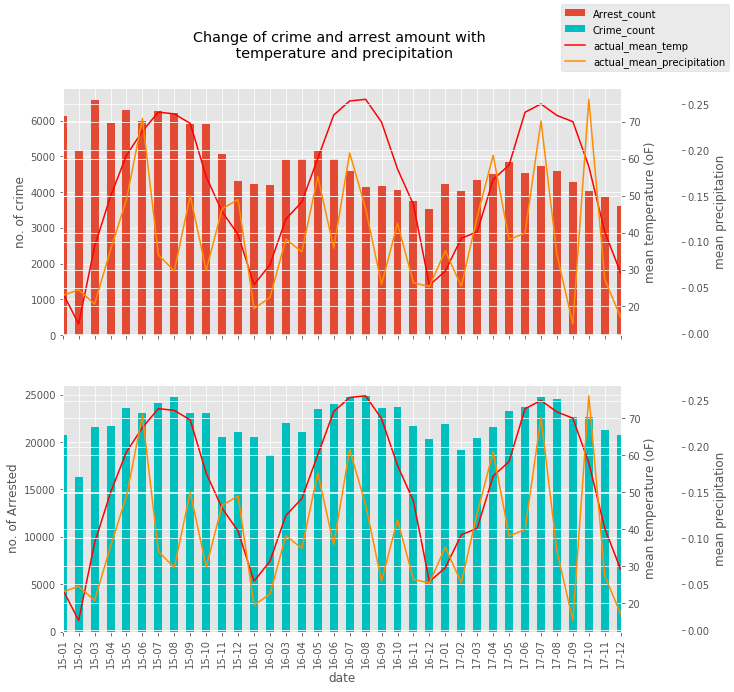

In [19]:
# Impact of weather on crime occurences

d1 = crime_weather.groupby(crime_weather.date.map(lambda x: x.strftime('%y-%m')))
crime_weather_new = pd.DataFrame({'Arrest_count':d1.arrest.sum(), 'Crime_count':d1.primary_type.count(), 
                                  'actual_mean_temp':d1.actual_mean_temp.mean(),
                                  'actual_mean_precipitation':d1.actual_precipitation.mean()})


f, ax = plt.subplots(2, sharex=True)
ax2 = ax[0].twinx()
px2 = ax[0].twinx()
ax3 = ax[1].twinx()
px3 = ax[1].twinx()
px3.spines['right'].set_position(('outward', 60))   
px2.spines['right'].set_position(('outward', 60))   


crime_weather_new.plot(y='Arrest_count', ax=ax[1], kind='bar', figsize=(10,10), legend=False)
crime_weather_new.plot(y='actual_mean_temp', use_index=False,color ='r', ax=ax3, legend=False)
crime_weather_new.plot(y='actual_mean_precipitation', use_index=False,color ='darkorange', ax=px3, legend=False)
plt.title('Change of crime and arrest amount with \n temperature and precipitation', y=2.3)


crime_weather_new.plot(y='Crime_count', ax=ax[0], kind='bar', color='c', legend=False)
crime_weather_new.plot(y='actual_mean_temp', use_index=False,color ='r', ax=ax2, legend=False)
crime_weather_new.plot(y='actual_mean_precipitation', use_index=False,color ='darkorange', ax=px2, legend=False)

f.legend(loc=0)
ax[0].set_ylabel('no. of crime')
ax[1].set_ylabel('no. of Arrested')
ax2.set_ylabel('mean temperature (oF)')
ax3.set_ylabel('mean temperature (oF)')
px2.set_ylabel('mean precipitation')
px3.set_ylabel('mean precipitation')

plt.show()

Based on the trends in crimes over time, it shows crimes are higher in the summer months from June to August, which could result from the hot weather. Therefore, it is necessary to study the impact of weather on crime. Two figures above shows variation of total number of crimes and number of crimes of which arrests were made with time, respectively, along with the change of mean temperature and precipitation over month. It is obvious that number of crimes are closely related to mean temperature, because they share the same trend over the month. However, number of crimes of which arrest was made doesn’t show close relationship with weather (temperature and precipitation) in the second figure.

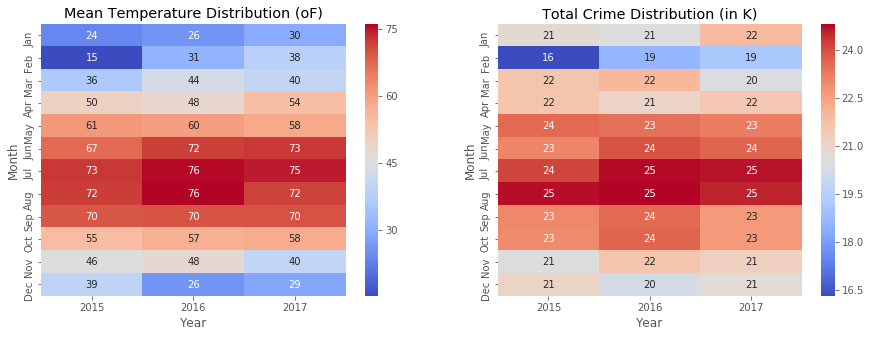

In [20]:
# Impact of temperature on crime occurences
crime_weather_yh = crime_weather.copy()
temp_yr_mth_df = pd.DataFrame(crime_weather_yh.groupby([crime_weather_yh.date.dt.strftime('%m'),'year'])\
                                .actual_mean_temp.mean()).reset_index()
temp_yr_mth_df.columns = ['month', 'year','mean_temperature']
temp_yr_mth_pvt = temp_yr_mth_df.pivot(values='mean_temperature', index='month', columns='year')

crime_yr_mth_df = pd.DataFrame(crime_weather_yh.groupby([crime_weather_yh.date.dt.strftime('%m'),'year'])\
                                .actual_mean_temp.count()).reset_index()

crime_yr_mth_df.columns = ['month', 'year','crime']
cirme_yr_mth_pvt = crime_yr_mth_df.pivot(values='crime', index='month', columns='year')

fig, ax = plt.subplots(1,2,figsize=(15,5))
ax2= plt.subplot(1, 2, 1)
ax2=sns.heatmap(temp_yr_mth_pvt, yticklabels=MonthNames, annot=True, cmap="coolwarm")
ax2.set_title("Mean Temperature Distribution (oF)")
ax2.set_xlabel("Year")
ax2.set_ylabel("Month")
    
ax2= plt.subplot(1, 2, 2)
ax3 = sns.heatmap(cirme_yr_mth_pvt/1000, yticklabels=MonthNames, annot=True, cmap="coolwarm")
ax3.set_title("Total Crime Distribution (in K)")
ax3.set_xlabel("Year")
ax3.set_ylabel("Month")
plt.show()     

In order to verify the close relationship between crime occurences and temperature, heatmap for mean temperature and total crime distribution over time are plotted in Figure 2.2. These heatmaps confirm that the occurrence of crime is high during May to September, when the mean temperature is higher than 60 oF . Usually during warm weather, people head outside for activities and park is crowded with parades and music festival, which brings more opportunities for crime occurrence.

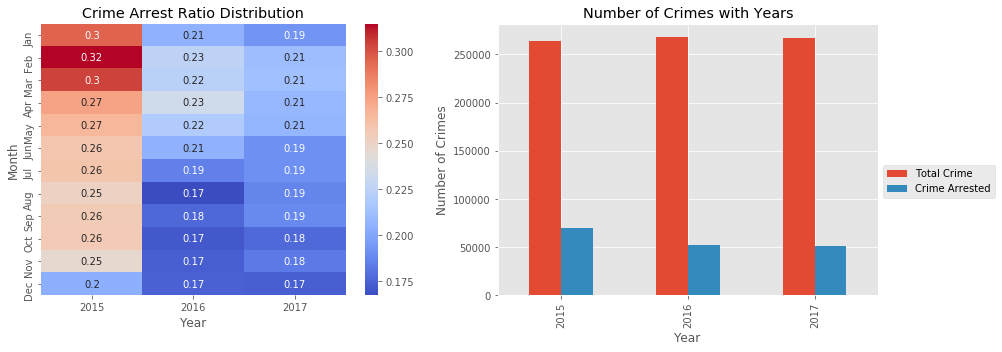

In [22]:
# Arrest ratio: no of crimes of which arrests were made/ total no of crimes 
arrest_yr_mth_df = pd.DataFrame(crime_weather_yh.groupby([crime_weather_yh.date.dt.strftime('%m'),'year'])\
                                .arrest.sum()/crime_weather_yh.groupby([crime_weather_yh.date.dt.strftime('%m'),'year'])\
                                .date.count()).reset_index()
arrest_yr_mth_df.columns = ['month', 'year','arrest_ratio']
arrest_yr_mth_pvt = arrest_yr_mth_df.pivot(values='arrest_ratio', index='month', columns='year')
crime_arrest_year =pd.DataFrame(crime_weather_yh.groupby('year')\
                                .date.count()).join(pd.DataFrame(crime_weather_yh.groupby('year').arrest.sum()))


fig, ax = plt.subplots(1,2,figsize=(15,5))
ax2= plt.subplot(1, 2, 1)
ax2 = sns.heatmap(arrest_yr_mth_pvt, yticklabels=MonthNames, annot=True, cmap="coolwarm")
ax2.set_title("Crime Arrest Ratio Distribution")
ax2.set_xlabel("Year")
ax2.set_ylabel("Month")

ax3= plt.subplot(1, 2, 2)
pl3 = crime_arrest_year.plot.bar(ax=ax3)
pl3.set_title('Number of Crimes with Years')
pl3.set_xlabel("Year")
pl3.set_ylabel("Number of Crimes")
pl3.legend(('Total Crime', 'Crime Arrested'), bbox_to_anchor=(1, 0.5))
plt.show()                         

Figure on the right side shows that total number of crimes has remained relatively constant over years, while the number of crimes of which arrests were made is continuously decreasing. In order to study the relationship between these two variables, the new term arrest ratio is introduced and defined by: no. of crimes of which arrests were made/ total no. of crimes. The crime arrest ratio distribution figure on the left side verifies that the arrest ratio is declining over year.



Text(0,0.5,'Arrest Ratio')

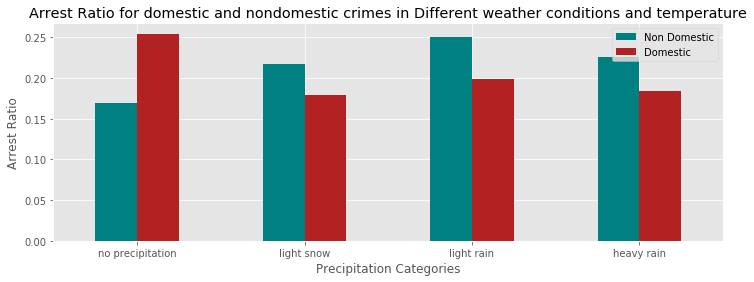

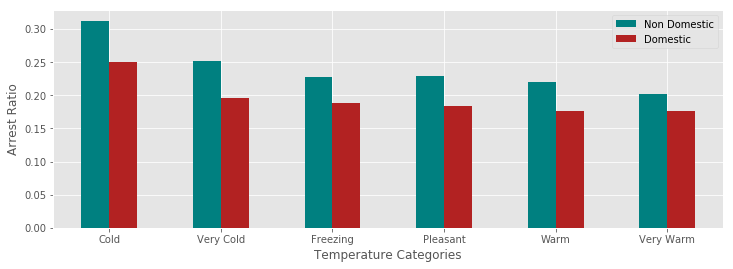

In [21]:
# Arrest ratio: no of crimes of which arrests were made/ total no of crimes 
# precipitation [light rain, heavy rain, light snow, heavy snow, no precipitation]
# temperature [freezing, very cold, cold, pleasant, warm, very warm]

precip_range =[-1, 0, 3, 6]
labels_precip = ['no ', 'light ', 'heavy ']
crime_weather_yh['precip_result'] = pd.cut(crime_weather_yh.actual_precipitation, precip_range,  labels=labels_precip).astype('category')
temp_range = [-3, 32, 84]
labels_temp = ['snow', 'rain']
crime_weather_yh['temp_result'] = pd.cut(crime_weather_yh.actual_mean_temp, temp_range,  labels=labels_temp).astype('category')
crime_weather_yh['condition'] = crime_weather_yh['precip_result'].astype('str') + crime_weather_yh['temp_result'].astype('str')
crime_weather_yh['condition'].replace(['no snow', 'no rain'],'no precipitation',inplace=True)

ax_1 = (crime_weather_yh.groupby(['condition', 'domestic']).arrest.sum()/crime_weather_yh.groupby(['condition', 'domestic']).date.count()).unstack().plot.bar(figsize=(12,4),color=['teal','firebrick'])
ax_1.legend(('Non Domestic', 'Domestic'))
ax_1.set_xticklabels(crime_weather_yh.condition.unique(), rotation='horizontal')
ax_1.set_xlabel('Precipitation Categories')
ax_1.set_ylabel('Arrest Ratio')
plt.title('Arrest Ratio for domestic and nondomestic crimes in Different weather conditions and temperature')
ax_2 = (crime_weather_yh.groupby(['temp_desc', 'domestic']).arrest.sum()/crime_weather_yh.groupby(['temp_desc', 'domestic']).date.count()).unstack().plot.bar(figsize=(12,4), color=['teal','firebrick'])
ax_2.legend(('Non Domestic', 'Domestic'))
ax_2.set_xticklabels(crime_weather_yh.temp_desc.unique(), rotation='horizontal')
ax_2.set_xlabel('Temperature Categories')
ax_2.set_ylabel('Arrest Ratio')


The impact of weather on arrest ratio is investigated in these two figures based on domestic and non-domestic crimes. Two category variables are created based on temperature and precipitation. In the first figure, the arrest ratio of domestic crime is highest during the day without precipitation, while arrest ratio of non-domestic crime is lowest during no precipitation day. According to temperature, both non-domestic and domestic crimes obtain the highest arrest ratio during cold day with temperature range from 15 to 50 oF.


# High Incidence Area

Text(0,0.5,'arrest ratio')

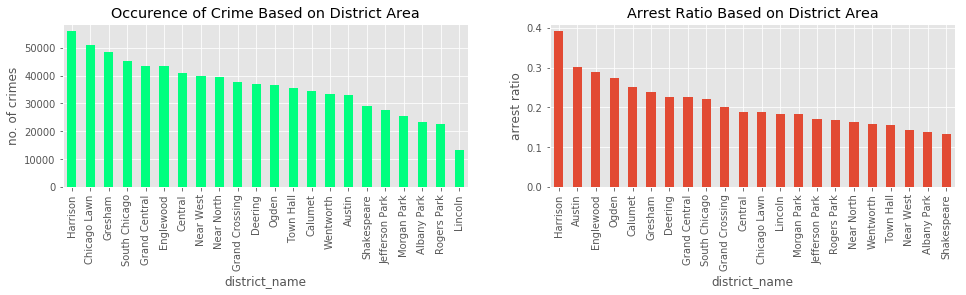

In [25]:
# Count of crime incidence by police district area

fig, ax = plt.subplots(1,2,figsize=(16,3))

ax1 = plt.subplot(1, 2, 1)
pl1=crime_weather_yh.groupby(['district_name']).date.count().sort_values(ascending=False)[:-1].plot.bar(ax=ax1, color='springgreen')
pl1.set_title('Occurence of Crime Based on District Area')
pl1.set_ylabel('no. of crimes')

ax0 = plt.subplot(1, 2, 2)
df1=pd.DataFrame(crime_weather_yh.groupby(['district_name']).arrest.sum()/crime_weather_yh.groupby(['district_name']).date.count())
df1.columns=['arrest_ratio']
pl0=df1.sort_values(by='arrest_ratio',ascending=False)[1:].plot.bar(ax=ax0)
ax0.legend().set_visible(False)
ax0.set_title('Arrest Ratio Based on District Area')
ax0.set_ylabel('arrest ratio')


The investigation of crime rate and arrest ratio based on police district would be important for a measure of police performance. The figure on the left shows the occurrence of crimes based on police district area. It shows that Lincoln, Rogers Park, Albany Park and Morgan Park are the most safest district area to live. An interesting discovery is that the arrest ratio in Harrison is as high as 0.38, though Harrison obtains the highest crimes. Therefore, it would be reasonable to evaluate the police performance based on not only crimes rate but also the arrest ratio.


In [26]:
# Create a new column based on Quarter
crime_weather_yh['Qt']=crime_weather_yh.date.dt.to_period('Q')
crime_weather_yh.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,property_crime,fbi_crime_type,fbi_cat,chicago_sides,district_name,street_name,precip_result,temp_result,condition,Qt
0,2015-01-01 08:00:00,055XX N MILWAUKEE AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,False,False,1622,16.0,...,False,Non-Index,CRIMINAL SEXUAL ABUSE,Far North Side,Jefferson Park,N MILWAUKEE AVE,no,snow,no precipitation,2015Q1
1,2015-01-01 00:01:00,023XX N BOSWORTH AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,1811,18.0,...,False,Non-Index,OFFENSE AGAINST FAMILY,North Side,Near North,N BOSWORTH AVE,no,snow,no precipitation,2015Q1
2,2015-01-01 00:01:00,053XX S HOMAN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,822,8.0,...,False,Non-Index,FRAUD,Southwest Side,Chicago Lawn,S HOMAN AVE,no,snow,no precipitation,2015Q1
3,2015-01-01 00:00:00,075XX S STEWART AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,623,6.0,...,False,Non-Index,OFFENSE AGAINST FAMILY,South Side,Gresham,S STEWART AVE,no,snow,no precipitation,2015Q1
4,2015-01-01 00:01:00,010XX N HERMITAGE AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,APARTMENT,False,False,1213,12.0,...,False,Non-Index,OFFENSE AGAINST FAMILY,West Side,Near West,N HERMITAGE AVE,no,snow,no precipitation,2015Q1


Text(0.5,51,'')

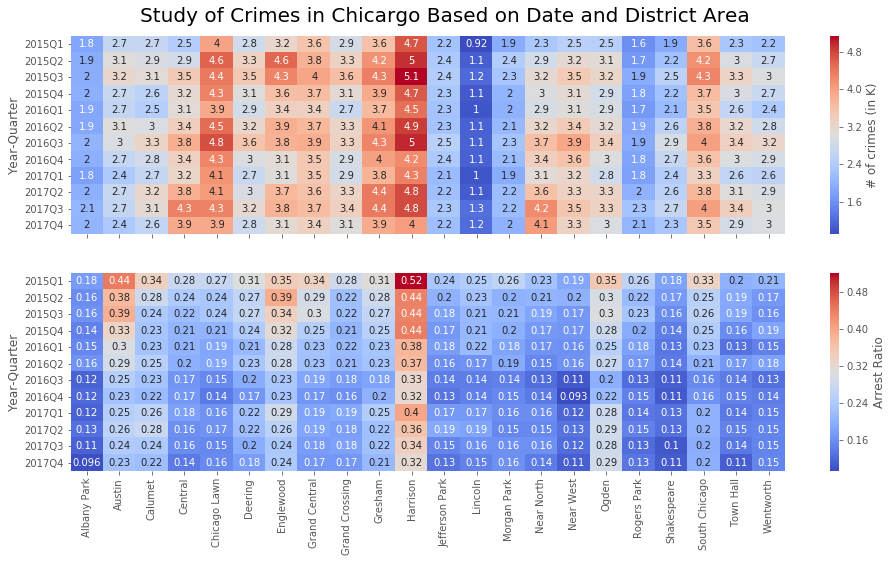

In [32]:
crime_dis_qt_df = pd.DataFrame(crime_weather_yh.groupby(['Qt','district_name']).date.count()/1000).reset_index()
crime_dis_qt_df.columns = ['qt', 'district','crime']
crime_dis_qt_pvt = crime_dis_qt_df.pivot(values='crime', index='qt', columns='district')
crime_dis_qt_pvt=crime_dis_qt_pvt.drop(['N/A'], axis=1)

arrest_dis_qt_df = pd.DataFrame(crime_weather_yh.groupby(['Qt','district_name'])\
                                .arrest.sum()/crime_weather_yh.groupby(['Qt','district_name'])\
                                .date.count()).reset_index()

arrest_dis_qt_df.columns = ['qt', 'district','arrest_ratio']
arrest_dis_qt_pvt = arrest_dis_qt_df.pivot(values='arrest_ratio', index='qt', columns='district')
arrest_dis_qt_pvt=arrest_dis_qt_pvt.drop(['N/A'], axis=1)

fig, ax = plt.subplots(2,1, figsize=(16,8))
fig.suptitle('Study of Crimes in Chicargo Based on Date and District Area', x=0.45, y=0.93, fontsize=20)
ax0 = plt.subplot(211)
ax0 = sns.heatmap(crime_dis_qt_pvt, annot=True, cmap="coolwarm", cbar_kws={'label': '# of crimes (in K)'})
ax0.axes.xaxis.set_ticklabels([])
ax0.set_xlabel("")
ax0.set_ylabel("Year-Quarter")

ax1 = plt.subplot(212)
ax1 = sns.heatmap(arrest_dis_qt_pvt, annot=True, cmap="coolwarm", cbar_kws={'label': 'Arrest Ratio'})
ax1.set_ylabel("Year-Quarter")
ax1.set_xlabel("")



In order to check the worst police district area with high crime occurrence and low arrest ratio, heatmaps of both crime and arrest ratio distribution over the time and police district area are plotted. It is obvious that police district areas, Gresham, Grand Central, Chicago Lawn amd Central,  obtain low arrest ratio with high crime occurrence, indicating better police strength and more patrols are needed in this areas.

In [33]:
# Crime count with time (quarter) for top 5 high incidence area (district no. 4,6,8,11,25)

crime_weather_yh['Qtr']= crime_weather_yh.date.dt.quarter
ax_6 = (crime_weather_yh[crime_weather_yh['district_name'].isin(['Central','Grand Central', 'Chicago Lawn','Gresham'])].groupby(['district_name','Qtr']))
ax_6_1 = pd.DataFrame(data={'crime_no':ax_6.Qtr.count()}).reset_index().set_index('district_name')

crime_weather_yh['Day']= crime_weather_yh.date.dt.weekday
ax_7 = (crime_weather_yh[crime_weather_yh['district_name'].isin(['Central','Grand Central', 'Chicago Lawn','Gresham'])].groupby(['district_name','Day']))
ax_7_1 = pd.DataFrame(data={'crime_no':ax_7.Day.count()}).reset_index().set_index('district_name')

ax_8 = (crime_weather_yh[crime_weather_yh['district_name'].isin(['Central','Grand Central', 'Chicago Lawn','Gresham'])].groupby(['district_name','time_desc']))
ax_8_1 = pd.DataFrame(data={'crime_no':ax_8.time_desc.count()}).reset_index().set_index('district_name')

ax_9 = (crime_weather_yh[crime_weather_yh['district_name'].isin(['Central','Grand Central', 'Chicago Lawn','Gresham'])].groupby(['district_name','condition']))
ax_9_1 = pd.DataFrame(data={'crime_no':ax_9.condition.count()}).reset_index().set_index('district_name')



Check when is more patrols needed in Central, Chicago Lawn, Grand Central, Gresham . Based on these results, the the occurence of crimes during Q2 and Q3, Friday, Early Afternoon and no rain or snow days are quite high. Therefore, it is important to increase the patrols during these condtions.

Text(0.5,0,'no. of Crimes')

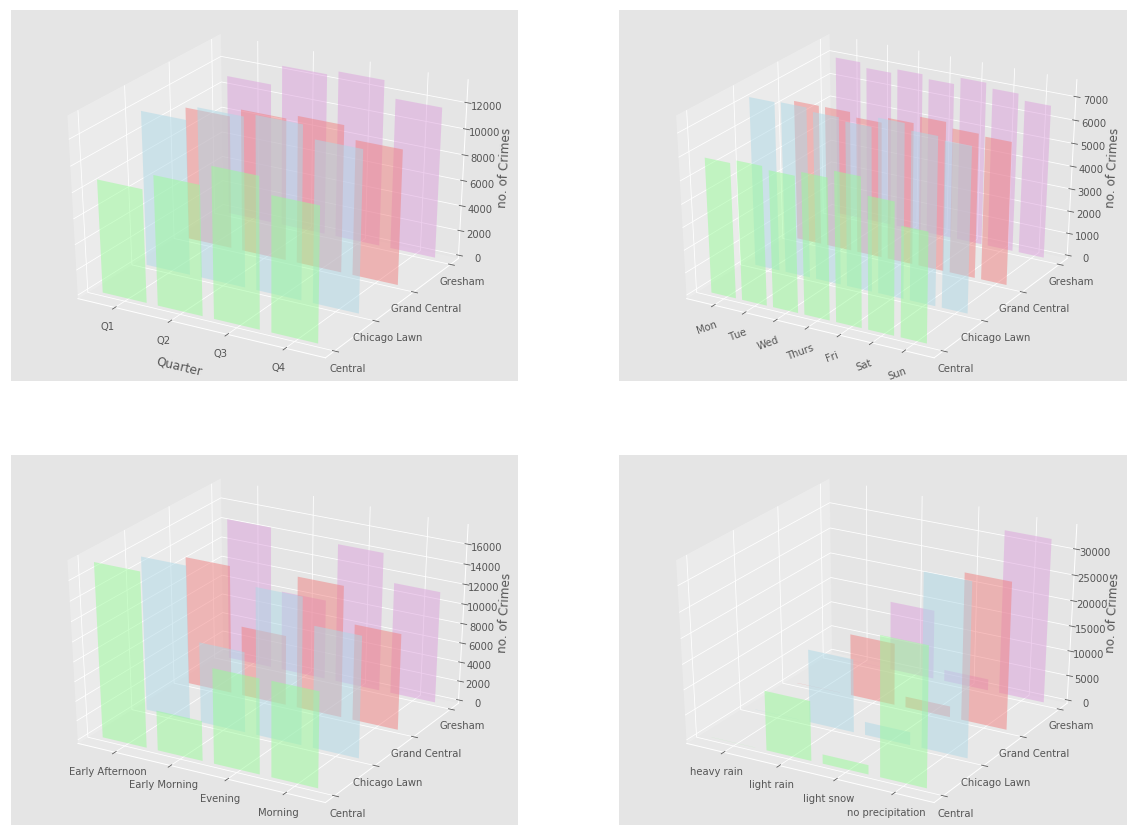

In [34]:
fig,ax = plt.subplots(2,2, figsize=(20,15))
ax1 = plt.subplot(221, projection='3d')

# z is used to fix the position of district no. on y axis, c represents color, s is the axact district no.
for c, z, s in zip(['palegreen', 'lightblue', 'lightcoral', 'plum'], [5, 10, 15, 20], ax_6_1.index.unique()):
    xs =  ax_6_1.Qtr.loc[s]
    ys =  ax_6_1.crime_no.loc[s]
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    ax1.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.5)

ax1.set_yticks([5, 10, 15, 20])
ax1.set_yticklabels(ax_6_1.index.unique())
ax1.set_xticks([1, 2, 3, 4])
ax1.set_xticklabels(['Q1','Q2','Q3','Q4'])
ax1.set_xlabel('Quarter',  labelpad=10)
ax1.set_zlabel('no. of Crimes')


ax2 = plt.subplot(222, projection='3d')
# z is used to fix the position of district no. on y axis, c represents color, s is the axact district no.
for c, z, s in zip(['palegreen', 'lightblue', 'lightcoral', 'plum'], [5, 10, 15, 20], ax_7_1.index.unique()):
    xs =  ax_7_1.Day.loc[s]
    ys =  ax_7_1.crime_no.loc[s]
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    ax2.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.5)

ax2.set_yticks([5, 10, 15, 20])
ax2.set_yticklabels(ax_7_1.index.unique())
ax2.set_xticklabels(['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'], rotation='20')
ax2.set_zlabel('no. of Crimes')

ax3 = plt.subplot(223, projection='3d')
# z is used to fix the position of district no. on y axis, c represents color, s is the axact district no.
for c, z, s in zip(['palegreen', 'lightblue', 'lightcoral', 'plum'], [5, 10, 15, 20], ax_8_1.index.unique()):
    xs =  ax_8_1.time_desc.loc[s]
    ys =  ax_8_1.crime_no.loc[s]
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    ax3.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.5)

ax3.set_yticks([5, 10, 15, 20])
ax3.set_yticklabels(ax_8_1.index.unique())
ax3.set_zlabel('no. of Crimes')

ax4 = plt.subplot(224, projection='3d')
# z is used to fix the position of district no. on y axis, c represents color, s is the axact district no.
for c, z, s in zip(['palegreen', 'lightblue', 'lightcoral', 'plum'], [5, 10, 15, 20], ax_9_1.index.unique()):
    xs =  ax_9_1.condition.loc[s]
    ys =  ax_9_1.crime_no.loc[s]
    # You can provide either a single color or an array. To demonstrate this,
    # the first bar of each set will be colored cyan.
    cs = [c] * len(xs)
    ax4.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.5)

ax4.set_yticks([5, 10, 15, 20])
ax4.set_yticklabels(ax_9_1.index.unique())
ax4.set_zlabel('no. of Crimes')

According to the study, Gresham, Grand Central, Chicago Lawn and Central police area needs better police performance. However, it comes with the questions when more patrols are needed in these areas. Therefore, the investigation of crime occurrences based on quarter, day of week, time and weather conditions are performed. It shows that these four district areas share some common findings that high crime occurrence happens in Quarter 2 and 3, Friday, early afternoon and the day without precipitation. However, in Gresham, Grand Central, and Chicago Lawn, the crime rate is also high during evening. Therefore, the patrols in these district areas are necessary to increase during these findings.

# Further Analysis of top 5 crime categories and Narcotics

- By Month
- By Day of Week

In [296]:
# Copy of the dataset added by Anu - 04/12/2018
cw1 = crime_weather.copy()

In [300]:
# Added column 'month' to analysis the variation of theft and other crimes during the 
#holiday season

cw1['month'] = cw1['date'].dt.month


In [301]:
# Added 3 more columns to help print the monthnames and day of week in plots
cw1['MthName'] = cw1['date'].dt.date.map(lambda x: x.strftime("%b"))
cw1['dow'] = cw1['date'].dt.date.map(lambda x: x.strftime("%a"))
cw1['dayofweek'] = cw1['date'].apply(lambda x: x.dayofweek)

In [302]:
cw1.head()

,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,district,...,actual_mean_temp,actual_min_temp,actual_max_temp,actual_precipitation,district_name,street_name,month,MthName,dow,dayofweek
0,2015-01-01 08:00:00,055XX N MILWAUKEE AVE,1582,OFFENSE INVOLVING CHILDREN,CHILD PORNOGRAPHY,RESIDENCE,False,False,1622,16.0,...,23,14,32,0.0,Jefferson Park,N MILWAUKEE AVE,1,Jan,Thu,3
1,2015-01-01 00:01:00,023XX N BOSWORTH AVE,1751,OFFENSE INVOLVING CHILDREN,CRIM SEX ABUSE BY FAM MEMBER,RESIDENCE,False,False,1811,18.0,...,23,14,32,0.0,Near North,N BOSWORTH AVE,1,Jan,Thu,3
2,2015-01-01 00:01:00,053XX S HOMAN AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,822,8.0,...,23,14,32,0.0,Chicago Lawn,S HOMAN AVE,1,Jan,Thu,3
3,2015-01-01 00:00:00,075XX S STEWART AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,RESIDENCE,False,True,623,6.0,...,23,14,32,0.0,Gresham,S STEWART AVE,1,Jan,Thu,3
4,2015-01-01 00:01:00,010XX N HERMITAGE AVE,1750,OFFENSE INVOLVING CHILDREN,CHILD ABUSE,APARTMENT,False,False,1213,12.0,...,23,14,32,0.0,Near West,N HERMITAGE AVE,1,Jan,Thu,3


# Crime % Variation from Mean by Year

1. The monthly average number of thefts is calculated for each year.  

2.  Every month's theft statistics calculated as a percentage change from the above monthly average each year and is plotted as a time series. 

In [343]:
# added by Anu on 04/14/2018
# Calculate %change from monthly average for each primary crime type and by year
# The plots will give insights as to the effect or holiday season or weather on different crime types
# The plots are for the top 5 crime types

#1. THEFT
# calculate the monthly averge theft for 2015 
tma15 = (cw1[(cw1.year == 2015) & (cw1.primary_type == 'THEFT')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average theft for 2015
t15 = ((((cw1[(cw1.year == 2015) & (cw1.primary_type == 'THEFT')]).groupby(cw1.month).primary_type.count())/ tma15) -1) * 100


# calculate the monthly averge theft for 2016 
tma16 = (cw1[(cw1.year == 2016) & (cw1.primary_type == 'THEFT')]).groupby(cw1.month).primary_type.count().mean()


# calculate the %change from the monthly average theft for 2016
t16 = ((((cw1[(cw1.year == 2016) & (cw1.primary_type == 'THEFT')]).groupby(cw1.month).primary_type.count()) / tma16) -1) * 100

# calculate the monthly averge theft for 2017 
tma17 = (cw1[(cw1.year == 2017) & (cw1.primary_type == 'THEFT')]).groupby(cw1.month).primary_type.count().mean()


# calculate the %change from the monthly average theft for 2017
t17 = ((((cw1[(cw1.year == 2017) & (cw1.primary_type == 'THEFT')]).groupby(cw1.month).primary_type.count()) / tma17) -1) * 100



In [344]:
#2. BATTERY
# calculate the monthly averge battery for 2015 
bma15 = (cw1[(cw1.year == 2015) & (cw1.primary_type == 'BATTERY')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average battery for 2015
b15 = ((((cw1[(cw1.year == 2015) & (cw1.primary_type == 'BATTERY')]).groupby(cw1.month).primary_type.count()) / bma15) -1) * 100


# calculate the monthly averge battery for 2016 
bma16 = (cw1[(cw1.year == 2016) & (cw1.primary_type == 'BATTERY')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average battery for 2016
b16 = ((((cw1[(cw1.year == 2016) & (cw1.primary_type == 'BATTERY')]).groupby(cw1.month).primary_type.count()) / bma16) -1) * 100


# calculate the monthly averge battery for 2017 
bma17 = (cw1[(cw1.year == 2017) & (cw1.primary_type == 'BATTERY')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average battery for 2017
b17 = ((((cw1[(cw1.year == 2017) & (cw1.primary_type == 'BATTERY')]).groupby(cw1.month).primary_type.count()) / bma17) -1) * 100



In [345]:
#3. CRIMINAL DAMAGE
# calculate the monthly averge criminal damamge for 2015 
cdma15 = (cw1[(cw1.year == 2015) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average criminal damamge for 2015
cd15 = ((((cw1[(cw1.year == 2015) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.month).primary_type.count()) / cdma15) -1) * 100

# calculate the monthly averge criminal damamge for 2016 
cdma16 = (cw1[(cw1.year == 2016) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average criminal damamge for 2016
cd16 = ((((cw1[(cw1.year == 2016) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.month).primary_type.count()) / cdma16) -1) * 100


# calculate the monthly averge criminal damamge for 2017 
cdma17 = (cw1[(cw1.year == 2017) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average criminal damamge for 2017
cd17 = ((((cw1[(cw1.year == 2017) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.month).primary_type.count()) / cdma17) -1) * 100



In [346]:
#4. ASSAULT
# calculate the monthly averge assault for 2015 
ama15 = (cw1[(cw1.year == 2015) & (cw1.primary_type == 'ASSAULT')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average assault for 2015
a15 = ((((cw1[(cw1.year == 2015) & (cw1.primary_type == 'ASSAULT')]).groupby(cw1.month).primary_type.count()) / ama15) -1) * 100


# calculate the monthly averge assault for 2016 
ama16 = (cw1[(cw1.year == 2016) & (cw1.primary_type == 'ASSAULT')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average assault for 2016
a16 = ((((cw1[(cw1.year == 2016) & (cw1.primary_type == 'ASSAULT')]).groupby(cw1.month).primary_type.count()) / ama16) -1) * 100


# calculate the monthly averge assault for 2017 
ama17 = (cw1[(cw1.year == 2017) & (cw1.primary_type == 'ASSAULT')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average assault for 2017
a17 = ((((cw1[(cw1.year == 2017) & (cw1.primary_type == 'ASSAULT')]).groupby(cw1.month).primary_type.count()) / ama17) -1) * 100




In [347]:
#5. DECEPTIVE PRACTICE
# calculate the monthly averge deceptive practice for 2015 
dpma15 = (cw1[(cw1.year == 2015) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average deceptive practice for 2015
dp15 = ((((cw1[(cw1.year == 2015) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.month).primary_type.count()) / dpma15) -1) * 100


# calculate the monthly averge deceptive practice for 2016 
dpma16 = (cw1[(cw1.year == 2016) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average deceptive practice for 2016
dp16 = ((((cw1[(cw1.year == 2016) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.month).primary_type.count()) / dpma16) -1) * 100


# calculate the monthly averge deceptive practice for 2017 
dpma17 = (cw1[(cw1.year == 2017) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average deceptive practice for 2017
dp17 = ((((cw1[(cw1.year == 2017) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.month).primary_type.count()) / dpma17) -1) * 100


In [348]:
#6. NARCOTICS
# calculate the monthly averge narcotics for 2015 
nma15 = (cw1[(cw1.year == 2015) & (cw1.primary_type == 'NARCOTICS')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average narcotics for 2015
n15 = ((((cw1[(cw1.year == 2015) & (cw1.primary_type == 'NARCOTICS')]).groupby(cw1.month).primary_type.count()) / nma15) -1) * 100


# calculate the monthly averge narcotics for 2016 
nma16 = (cw1[(cw1.year == 2016) & (cw1.primary_type == 'NARCOTICS')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average theft for 2016
n16 = ((((cw1[(cw1.year == 2016) & (cw1.primary_type == 'NARCOTICS')]).groupby(cw1.month).primary_type.count()) / nma16) -1) * 100


# calculate the monthly averge narcotics for 2017 
nma17 = (cw1[(cw1.year == 2017) & (cw1.primary_type == 'NARCOTICS')]).groupby(cw1.month).primary_type.count().mean()

# calculate the %change from the monthly average narcotics for 2017
n17 = ((((cw1[(cw1.year == 2017) & (cw1.primary_type == 'NARCOTICS')]).groupby(cw1.month).primary_type.count()) / nma17) -1) * 100



In [349]:
# define month names as a list to print as xticklabels in the plots 
Months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec' ]

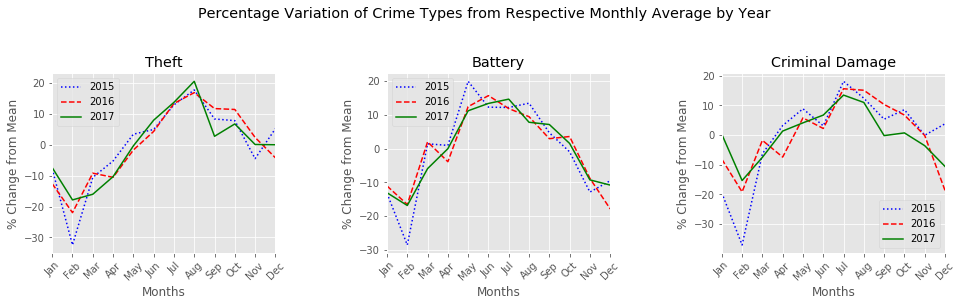

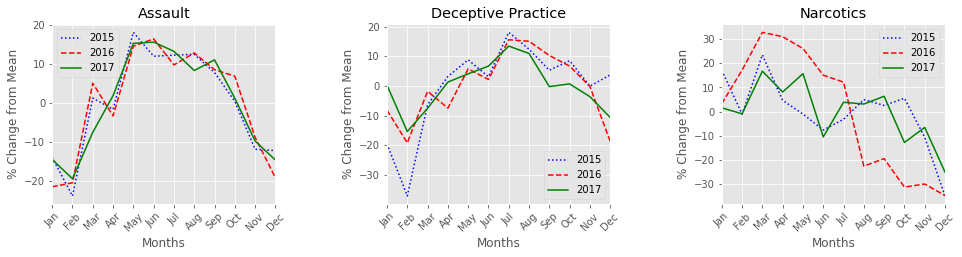

In [350]:
# Chart subplots to show by Year,the Percentage Variation of top 5 crime types and 'NARCOTICS' from their respective 
# monthly average by year

f, ax = plt.subplots(1,3,figsize=(16,4))

plt.suptitle("Percentage Variation of Crime Types from Respective Monthly Average by Year", fontsize='x-large')
f.subplots_adjust(top=0.75, wspace=0.5)

ax1=plt.subplot(1,3,1)
ax1.set_title("Theft")
t15.plot(kind='line', label='2015', ax=ax1, color= 'blue', linestyle='dotted')
t16.plot(kind='line', label='2016', ax=ax1, color= 'red', linestyle= 'dashed')
t17.plot(kind='line', label='2017', ax=ax1, color= 'green', linestyle='solid')
ax1.set_xlabel("Months")
ax1.xaxis.set_ticks(np.arange(1, 13, 1))
ax1.set_xticklabels(Months, rotation=45)
ax1.set_ylabel("% Change from Mean")
ax1.legend()

ax2=plt.subplot(1,3,2)
ax2.set_title("Battery")
b15.plot(kind='line', label='2015', ax=ax2, color= 'blue', linestyle='dotted')
b16.plot(kind='line', label='2016', ax=ax2, color= 'red', linestyle='dashed')
b17.plot(kind='line', label='2017', ax=ax2, color= 'green', linestyle='solid')
ax2.set_xlabel("Months")
ax2.xaxis.set_ticks(np.arange(1, 13, 1))
ax2.set_xticklabels(Months, rotation=45)
ax2.set_ylabel("% Change from Mean")
ax2.legend()

ax3=plt.subplot(1,3,3)
ax3.set_title("Criminal Damage")
cd15.plot(kind='line', label='2015', ax=ax3, color= 'blue', linestyle='dotted')
cd16.plot(kind='line', label='2016', ax=ax3, color= 'red',linestyle='dashed')
cd17.plot(kind='line', label='2017', ax=ax3, color= 'green', linestyle='solid')
ax3.set_xlabel("Months")
ax3.xaxis.set_ticks(np.arange(1, 13, 1))
ax3.set_xticklabels(Months, rotation=45)
ax3.set_ylabel("% Change from Mean")
ax3.legend()

plt.show()

f, ax = plt.subplots(1,3,figsize=(16,4))
f.subplots_adjust(top=0.75, wspace=0.5)

ax4=plt.subplot(1,3,1)
ax4.set_title("Assault")
a15.plot(kind='line', label='2015', ax=ax4, color= 'blue', linestyle='dotted')
a16.plot(kind='line', label='2016', ax=ax4, color= 'red', linestyle='dashed')
a17.plot(kind='line', label='2017', ax=ax4, color= 'green', linestyle='solid')
ax4.set_xlabel("Months")
ax4.xaxis.set_ticks(np.arange(1, 13, 1))
ax4.set_xticklabels(Months, rotation=45)
ax4.set_ylabel("% Change from Mean")
ax4.legend()


ax5=plt.subplot(1,3,2)
ax5.set_title("Deceptive Practice")
dp15.plot(kind='line', label='2015', ax=ax5, color= 'blue', linestyle='dotted')
dp16.plot(kind='line', label='2016', ax=ax5, color= 'red', linestyle='dashed')
dp17.plot(kind='line', label='2017', ax=ax5, color= 'green', linestyle='solid')
ax5.set_xlabel("Months")
ax5.xaxis.set_ticks(np.arange(1, 13, 1))
ax5.set_xticklabels(Months, rotation=45)
ax5.set_ylabel("% Change from Mean")
ax5.legend()

ax6=plt.subplot(1,3,3)
ax6.set_title("Narcotics")
n15.plot(kind='line', label='2015', ax=ax6, color= 'blue', linestyle='dotted')
n16.plot(kind='line', label='2016', ax=ax6, color= 'red', linestyle='dashed')
n17.plot(kind='line', label='2017', ax=ax6, color= 'green', linestyle='solid')
ax6.set_xlabel("Months")
ax6.xaxis.set_ticks(np.arange(1, 13, 1))
ax6.set_xticklabels(Months, rotation=45)
ax6.set_ylabel("% Change from Mean")
ax6.legend()

plt.show()

The crime pattern is consistent across all three years for the top 5 crimes.  Narcotics in 2016 was abnormally high from March to June.

Various crimes peak at different months.  Theft, criminal damage and deceptive practices peak in late summer whereas battery, assault and narcotics peak in late winter/early spring months.  The correlation between the seasons (temperatures) and when the crimes peak seem to be strong.


- Does Theft increase with holiday season?

The theft crime pattern is consistent in all three years and varies very little from the mean during the months of November and December which is the holiday season.  So, it can be concluded that theft does not increase substantially during the holiday season.



# Crime vs. Day of Week

In [335]:
# THEFT

tdow15 = (cw1[(cw1.year == 2015) & (cw1.primary_type == 'THEFT')]).groupby(cw1.dayofweek).dayofweek.count()

tdow16 = (cw1[(cw1.year == 2016) & (cw1.primary_type == 'THEFT')]).groupby(cw1.dayofweek).dayofweek.count()

tdow17 = (cw1[(cw1.year == 2017) & (cw1.primary_type == 'THEFT')]).groupby(cw1.dayofweek).dayofweek.count()



In [336]:
# BATTERY

bdow15 = (cw1[(cw1.year == 2015) & (cw1.primary_type == 'BATTERY')]).groupby(cw1.dayofweek).dayofweek.count()

bdow16 = (cw1[(cw1.year == 2016) & (cw1.primary_type == 'BATTERY')]).groupby(cw1.dayofweek).dayofweek.count()

bdow17 = (cw1[(cw1.year == 2017) & (cw1.primary_type == 'BATTERY')]).groupby(cw1.dayofweek).dayofweek.count()



In [337]:
# CRIMINAL DAMAGE

cdow15 = (cw1[(cw1.year == 2015) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.dayofweek).dayofweek.count()

cdow16 = (cw1[(cw1.year == 2016) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.dayofweek).dayofweek.count()

cdow17 = (cw1[(cw1.year == 2017) & (cw1.primary_type == 'CRIMINAL DAMAGE')]).groupby(cw1.dayofweek).dayofweek.count()


In [338]:
#ASSAULT

adow15 = (cw1[(cw1.year == 2015) & (cw1.primary_type == 'ASSAULT')]).groupby(cw1.dayofweek).dayofweek.count()

adow16 = (cw1[(cw1.year == 2016) & (cw1.primary_type == 'ASSAULT')]).groupby(cw1.dayofweek).dayofweek.count()

adow17 = (cw1[(cw1.year == 2017) & (cw1.primary_type == 'ASSAULT')]).groupby(cw1.dayofweek).dayofweek.count()


In [339]:
# DECPTIVE PRACTICE

ddow15 = (cw1[(cw1.year == 2015) & (cw1.primary_type == 'DECEPTIVE PRACTICE')]).groupby(cw1.dayofweek).dayofweek.count()

ddow16 = (cw1[(cw1.year == 2016) & (cw1.primary_type == 'DECEPTIVE PRACTICE')]).groupby(cw1.dayofweek).dayofweek.count()

ddow17 = (cw1[(cw1.year == 2017) & (cw1.primary_type == 'DECEPTIVE PRACTICE')]).groupby(cw1.dayofweek).dayofweek.count()


In [340]:
# NARCOTICS

ndow15 = (cw1[(cw1.year == 2015) & (cw1.primary_type == 'NARCOTICS')]).groupby(cw1.dayofweek).dayofweek.count()

ndow16 = (cw1[(cw1.year == 2016) & (cw1.primary_type == 'NARCOTICS')]).groupby(cw1.dayofweek).dayofweek.count()

ndow17 = (cw1[(cw1.year == 2017) & (cw1.primary_type == 'NARCOTICS')]).groupby(cw1.dayofweek).dayofweek.count()


In [341]:
DoW = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

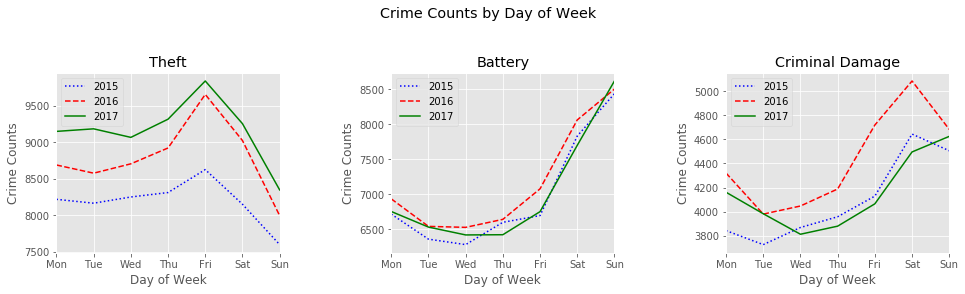

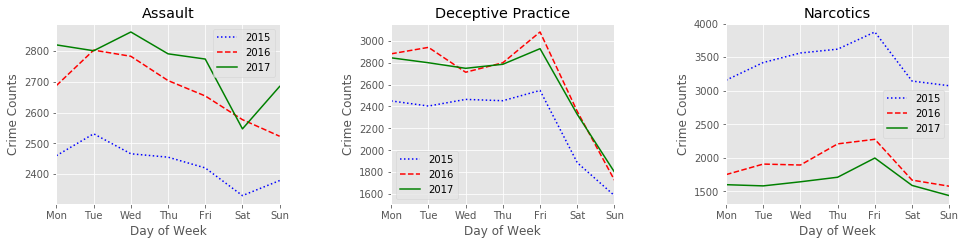

In [342]:
# Plot the crime counts by day of week
# Identigying a specific crime to be high on a specific day of week might help the Police to watch out accordingly
# first row : Theft, Battery, Criminal Damage

f, ax = plt.subplots(1,3,figsize=(16,4))
plt.suptitle("Crime Counts by Day of Week", fontsize='x-large')
f.subplots_adjust(top=0.75, wspace=0.5)

ax1=plt.subplot(1,3,1)
ax1.set_title("Theft")
tdow15.plot(kind='line', label='2015', ax=ax1, color='blue', linestyle = 'dotted')
tdow16.plot(kind='line', label='2016', ax=ax1, color='red', linestyle = 'dashed')
tdow17.plot(kind='line', label='2017', ax=ax1, color='green', linestyle = 'solid')
ax1.set_xlabel("Day of Week")
ax1.xaxis.set_ticks(np.arange(0, 7, 1))
ax1.set_xticklabels(DoW)
ax1.set_ylabel("Crime Counts")
ax1.legend()

ax2=plt.subplot(1,3,2)
ax2.set_title("Battery")
bdow15.plot(kind='line', label='2015', ax=ax2, color='blue', linestyle = 'dotted')
bdow16.plot(kind='line', label='2016', ax=ax2, color='red',  linestyle = 'dashed')
bdow17.plot(kind='line', label='2017', ax=ax2, color='green', linestyle = 'solid')
ax2.set_xlabel("Day of Week")
ax2.xaxis.set_ticks(np.arange(0, 7, 1))
ax2.set_xticklabels(DoW)
ax2.set_ylabel("Crime Counts")
ax2.legend()

ax3=plt.subplot(1,3,3)
ax3.set_title("Criminal Damage")
cdow15.plot(kind='line', label='2015', ax=ax3, color='blue', linestyle = 'dotted')
cdow16.plot(kind='line', label='2016', ax=ax3, color='red',  linestyle = 'dashed')
cdow17.plot(kind='line', label='2017', ax=ax3, color='green',  linestyle = 'solid')
ax3.set_xlabel("Day of Week")
ax3.xaxis.set_ticks(np.arange(0, 7, 1))
ax3.set_xticklabels(DoW)
ax3.set_ylabel("Crime Counts")
ax3.legend()

# second row : Assault, Deceptive Practice, Narcotics

f, ax = plt.subplots(1,3,figsize=(16,4))
f.subplots_adjust(top=0.75, wspace=0.5)

ax1=plt.subplot(1,3,1)
ax1.set_title("Assault")
adow15.plot(kind='line', label='2015', ax=ax1, color='blue', linestyle = 'dotted')
adow16.plot(kind='line', label='2016', ax=ax1, color='red', linestyle = 'dashed')
adow17.plot(kind='line', label='2017', ax=ax1, color='green', linestyle = 'solid')
ax1.set_xlabel("Day of Week")
ax1.xaxis.set_ticks(np.arange(0, 7, 1))
ax1.set_xticklabels(DoW)
ax1.set_ylabel("Crime Counts")
ax1.legend()

ax2=plt.subplot(1,3,2)
ax2.set_title("Deceptive Practice")
ddow15.plot(kind='line', label='2015', ax=ax2, color='blue', linestyle = 'dotted')
ddow16.plot(kind='line', label='2016', ax=ax2, color='red', linestyle = 'dashed')
ddow17.plot(kind='line', label='2017', ax=ax2, color='green', linestyle = 'solid')
ax2.set_xlabel("Day of Week")
ax2.xaxis.set_ticks(np.arange(0, 7, 1))
ax2.set_xticklabels(DoW)
ax2.set_ylabel("Crime Counts")
ax2.legend()

ax3=plt.subplot(1,3,3)
ax3.set_title("Narcotics")
ndow15.plot(kind='line', label='2015', ax=ax3, color='blue', linestyle = 'dotted')
ndow16.plot(kind='line', label='2016', ax=ax3, color='red', linestyle = 'dashed')
ndow17.plot(kind='line', label='2017', ax=ax3, color='green', linestyle = 'solid')
ax3.set_xlabel("Day of Week")
ax3.xaxis.set_ticks(np.arange(0, 7, 1))
ax3.set_xticklabels(DoW)
ax3.set_ylabel("Crime Counts")
ax3.legend()


plt.show()

The analysis shows a clear pattern between the type of crime and the day of the week for all three years of data.  

There is a consistent pattern of  high incidence of Theft on Fridays.  Theft on Saturdays is still higher than the other days of the week while it is lowest on Sundays when most people stay home.   It should also be noted that Theft crimes have gradually increased year-over-year for the period 2015 to 2017.

Similarly, Battery type of crime peaks on Sundays while Criminal Damage is higher on Saturdays.  Assault can be high on Tuesdays or Wednesdays.  

Both Deceptive Practices and Narcotics show a rise on Friday along with Theft.  More people being out and about on Fridays could be a key factor influencing the spike in these categories of crime.  

Crimes involving Narcotics have declined over the three years from 2015 - 2017.   
